In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.preprocessing import Binarizer, StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, auc

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# 1 导入数据

In [4]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

#### 减小内存占用

In [7]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            #df[col] = df[col].astype('category')
            pass
        
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
#因为有些缺失值可能会用-999之类的代替，所以暂时先不做内存删减
#reduce_mem_usage(train)

In [9]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [10]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### 防止在EDA时数据被屡次破坏，做一个备份，就可以不用读取数据了

In [11]:
from copy import deepcopy
train_bak = deepcopy(train)
test_bak = deepcopy(test)

In [124]:
#恢复数据
train = deepcopy(train_bak)
test = deepcopy(test_bak)

In [14]:
#为了方便之后对test的操作，用df代替train
df=train

# 2 EDA 探索性数据分析

## 2.1 看样本分布

0    282686
1     24825
Name: TARGET, dtype: int64


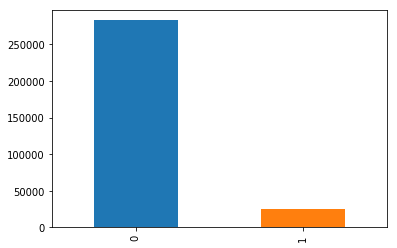

In [12]:
#看一下正负样本
print(train.TARGET.value_counts())
train.TARGET.value_counts().plot(kind="bar");

正负比例大概为1:10，注意不平衡数据的处理

## 2.2 看缺失值

In [130]:
#需要删除的列
drop_columns = []
#二值化列
bin_columns = []
#one_hot列
one_hot_columns = []

In [14]:
#看一下缺失列
loss_stat = pd.Series(train.isnull().sum()/train.shape[0])
loss_stat.sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MEDI                   0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_ME

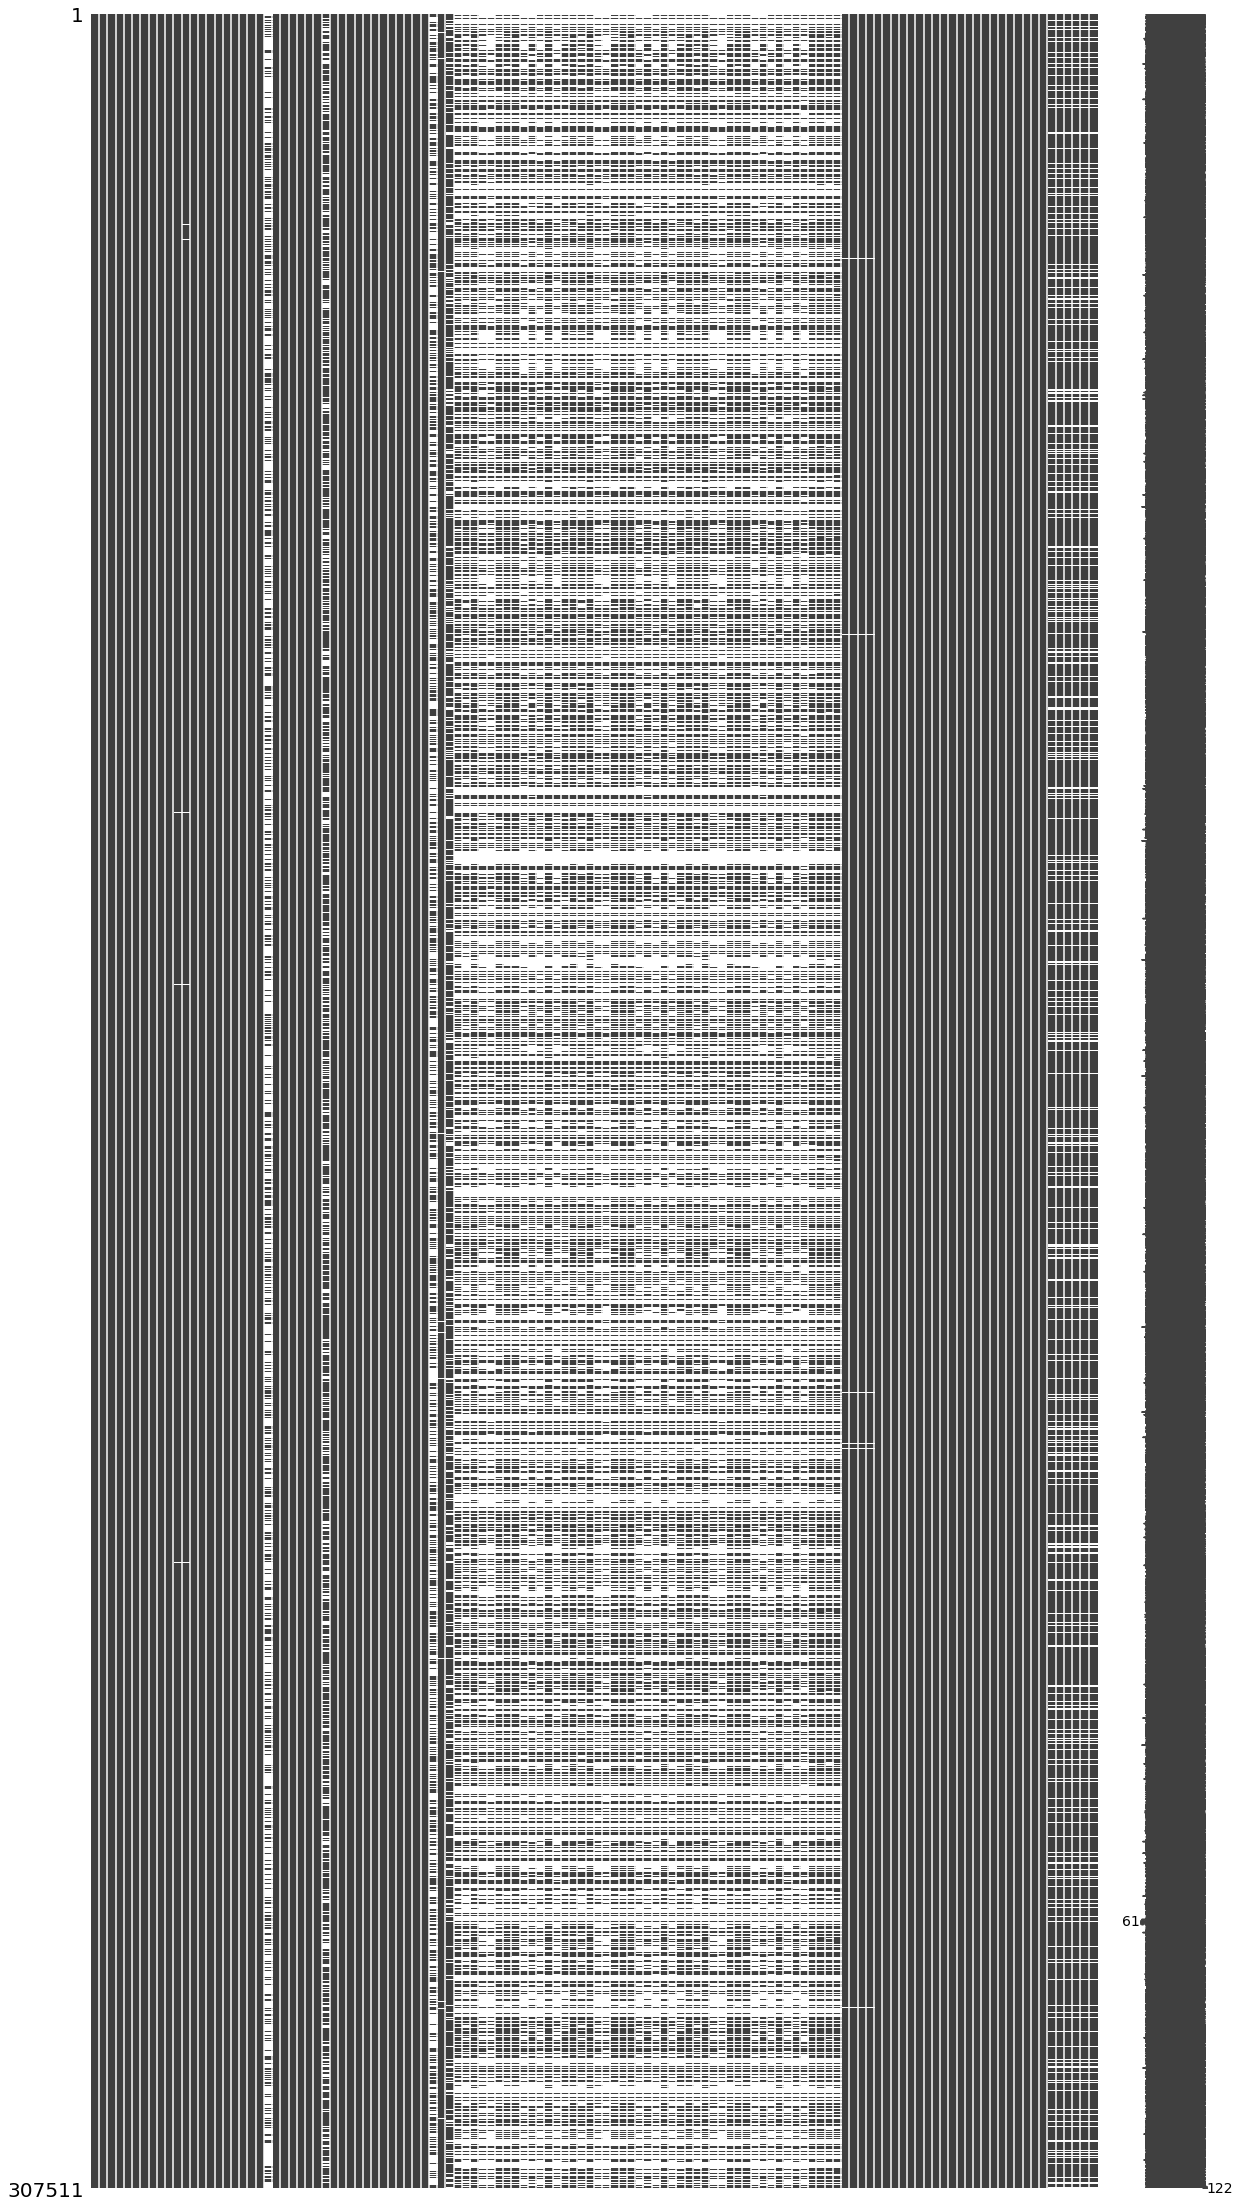

In [15]:
#上神器，看缺失值
import missingno as msno
msno.matrix(train, inline=True, sparkline=True, figsize=(20,40), sort=None)

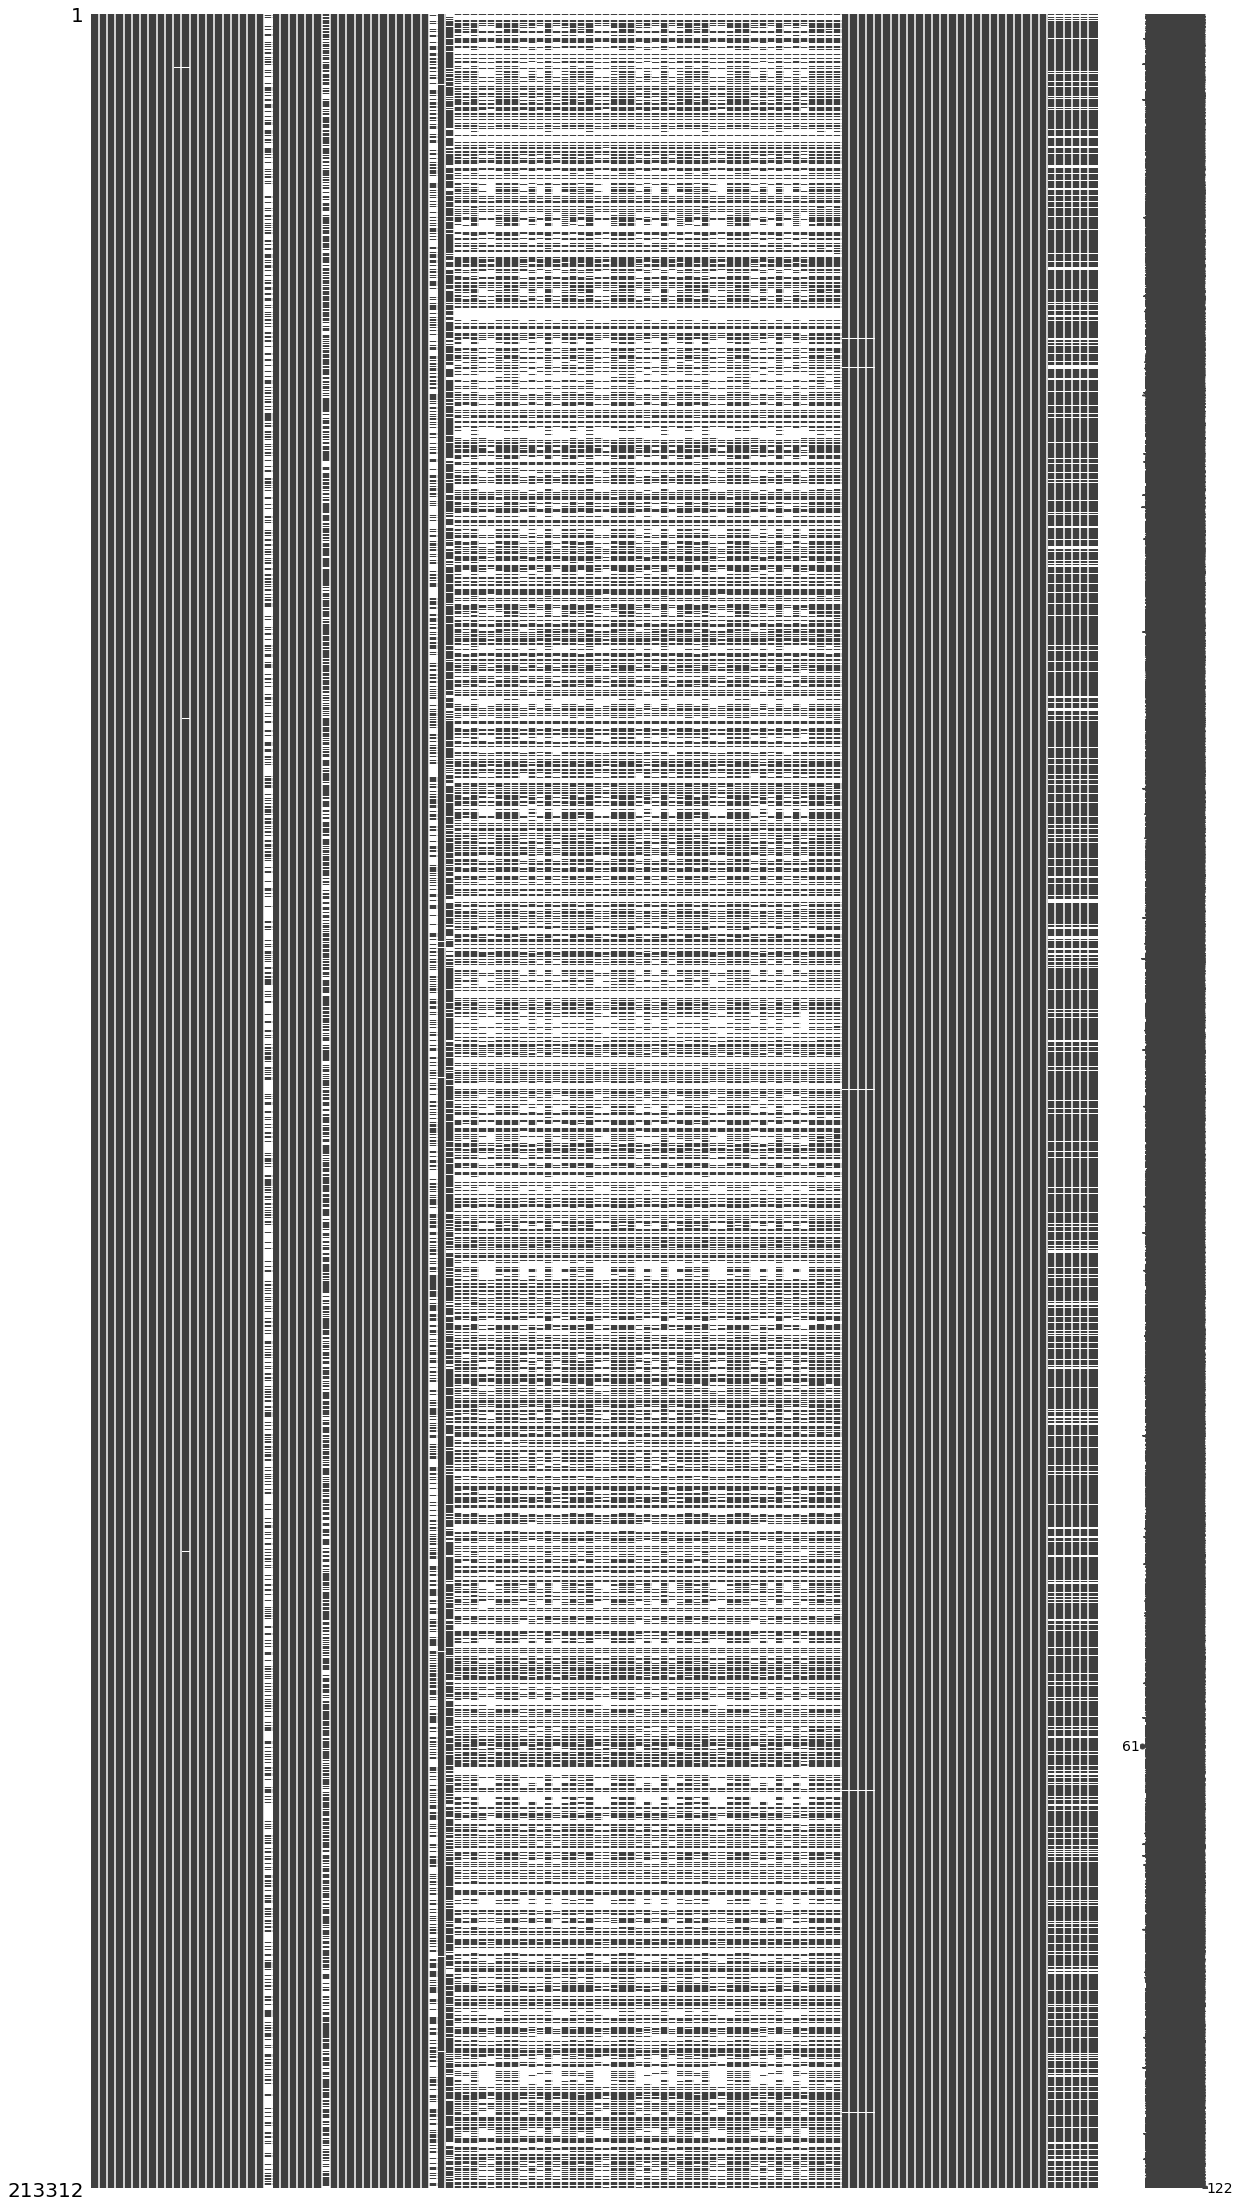

In [16]:
#可以看到，大部分缺失值为建筑信息，而建筑信息
#根据是否拥有房屋来看缺失值
train_realty_Y = train[train["FLAG_OWN_REALTY"]=="Y"]
msno.matrix(train_realty_Y, inline=True, sparkline=True, figsize=(20,40), sort=None)

可以看到，有房屋时，房屋信息缺失值也很多，所以，暂时这些房屋数据都删掉吧

In [17]:
loss_stat = pd.Series(train.isnull().sum()/train.shape[0])
loss_stat.sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MEDI                   0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_ME

看一下缺失值部分与TARGET的相关性

In [101]:
from copy import deepcopy
def plot_col_dis_by_target(col_name):
    fig, axs = plt.subplots(2,1, figsize=(10,5))
    if train[col_name].dtype == object:
        _data = train[col_name]
        _data_0 = _data[_data==0]
        _data_1 = _data[_data==1]
        _value_counts = _data.value_counts()
        _value_counts_0 = _data_0.value_counts()
        _value_counts_1 = _data_1.value_counts()
        _cat_map = {x:y for x,y in zip(_value_counts.index, np.zeros(len(_value_counts)))}
        _cat_map_0 = deepcopy(_cat_map)
        _cat_map_1 = deepcopy(_cat_map)
        for i in _value_counts.index:
            _cat_map_0[i] = _cat_map_0.get(i,0)
        for i in _value_counts.index:
            _cat_map_1[i] = _cat_map_1.get(i,0)
        if _data_0.notnull().sum() != 0:
            _nan = pd.Series(_data_0.notnull().sum(), index=["nan"])
            _nan.append(_cat_map_0)
            _cat_map = _nan
        if _data_1.notnull().sum() != 0:
            _nan = pd.Series(_data_1.notnull().sum(), index=["nan"])
            _nan.append(_cat_map_1)
            _cat_map_1 = _nan
        _col_0 = [_data_0.notnull().sum()].extend([_cat_map_0[x] for x in _value_counts.index])
        _col_1 = [_data_1.notnull().sum()].extend([_cat_map_1[x] for x in _value_counts.index])
        sns.barplot(range(1,len(_value_counts)+1),_col_0, ax=axs[0], label=col_name+'0')
        sns.barplot(range(1,len(_value_counts)+1),_col_1, ax=axs[0], label=col_name+'1')
    else:
        _col_0 = train[train["TARGET"]==0][col_name]
        _col_1 = train[train["TARGET"]==1][col_name]
        sns.distplot(_col_0[_col_0.notnull()], ax=axs[0])
        sns.distplot(_col_1[_col_1.notnull()], ax=axs[1])

========== SK_ID_CURR +
========== TARGET +
========== NAME_CONTRACT_TYPE +
========== CODE_GENDER +
========== FLAG_OWN_CAR +
========== FLAG_OWN_REALTY +
========== CNT_CHILDREN +
========== AMT_INCOME_TOTAL +
========== AMT_CREDIT +
========== AMT_ANNUITY +
========== AMT_GOODS_PRICE +
========== NAME_TYPE_SUITE +
========== NAME_INCOME_TYPE +
========== NAME_EDUCATION_TYPE +
========== NAME_FAMILY_STATUS +
========== NAME_HOUSING_TYPE +
========== REGION_POPULATION_RELATIVE +
========== DAYS_BIRTH +
========== DAYS_EMPLOYED +
========== DAYS_REGISTRATION +
========== DAYS_ID_PUBLISH +
========== OWN_CAR_AGE +
========== FLAG_MOBIL +
========== FLAG_EMP_PHONE +
========== FLAG_WORK_PHONE +
========== FLAG_CONT_MOBILE +
========== FLAG_PHONE +
========== FLAG_EMAIL +
========== OCCUPATION_TYPE +
========== CNT_FAM_MEMBERS +
========== REGION_RATING_CLIENT +
========== REGION_RATING_CLIENT_W_CITY +
========== WEEKDAY_APPR_PROCESS_START +
========== HOUR_APPR_PROCESS_START +
==========

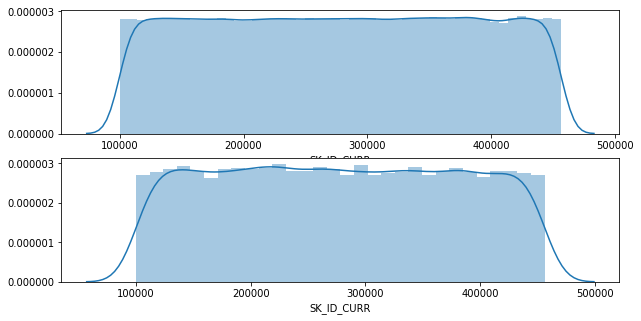

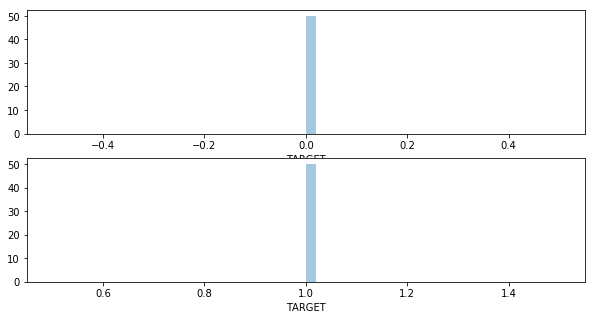

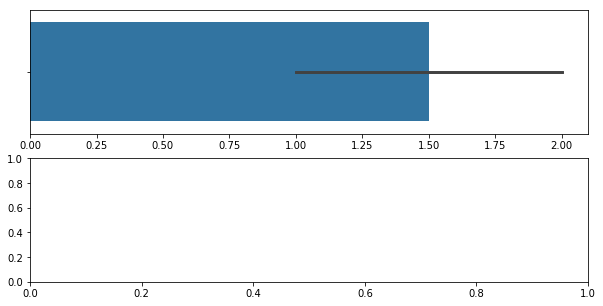

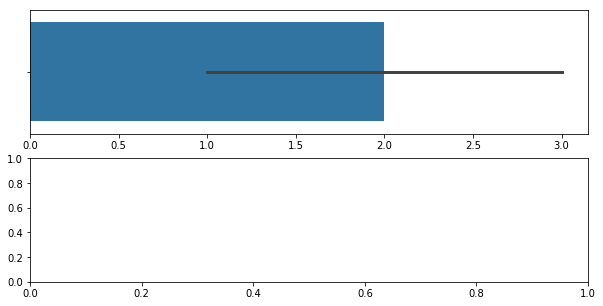

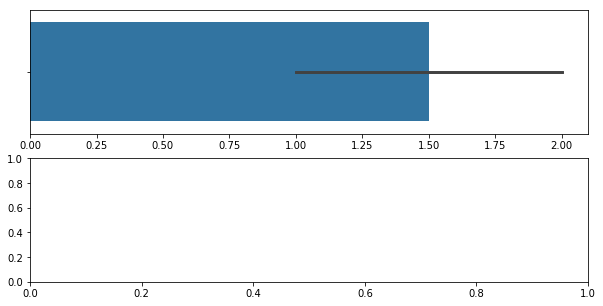

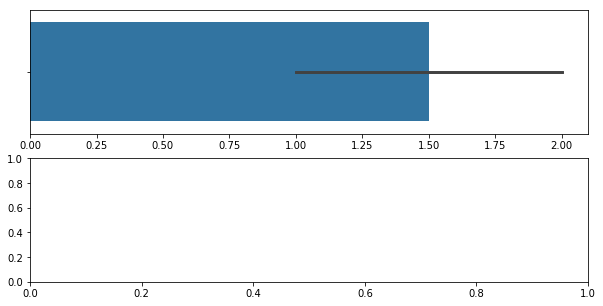

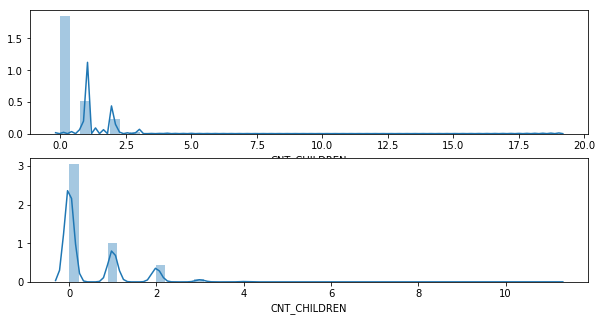

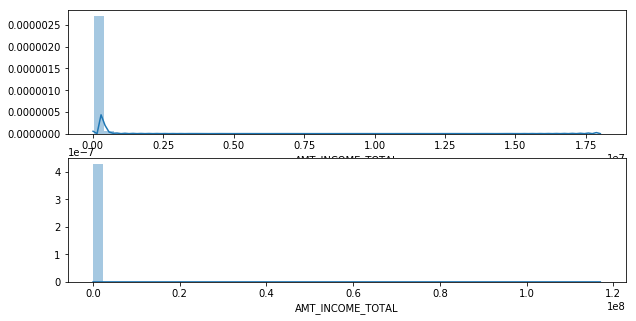

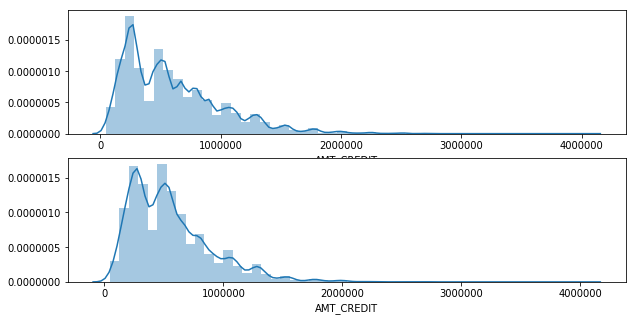

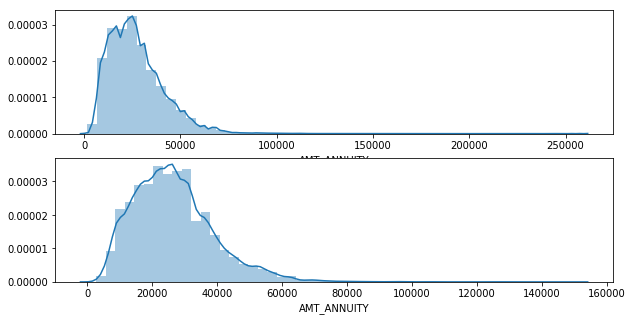

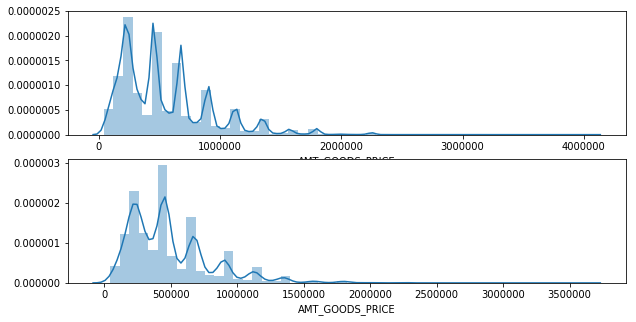

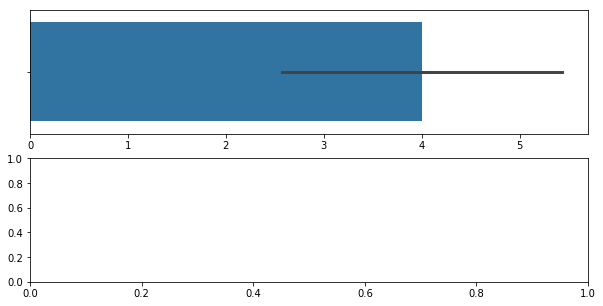

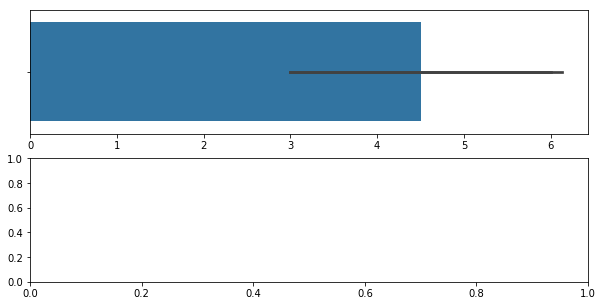

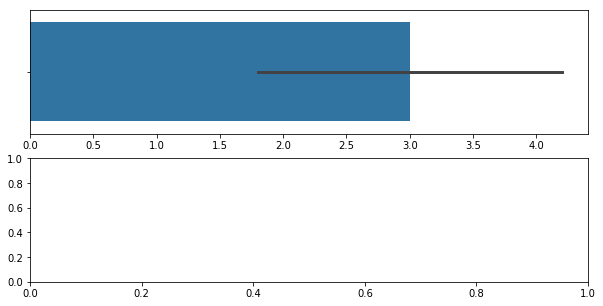

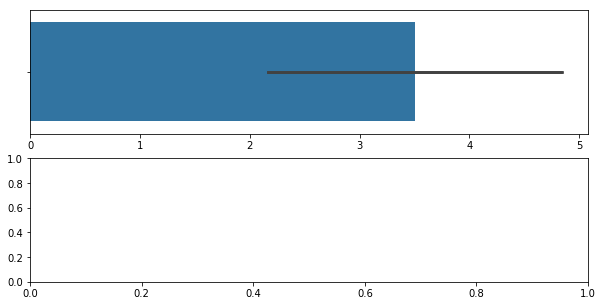

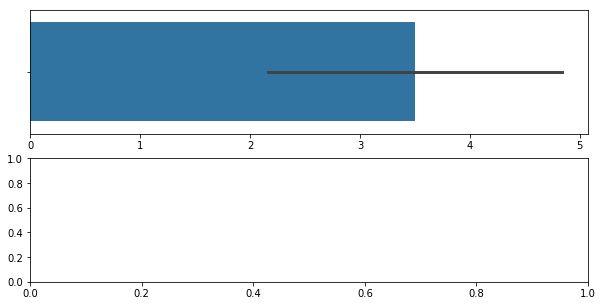

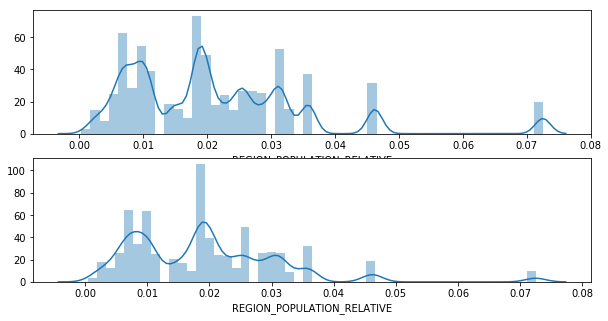

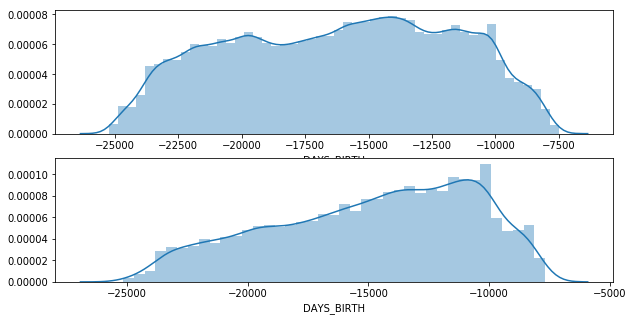

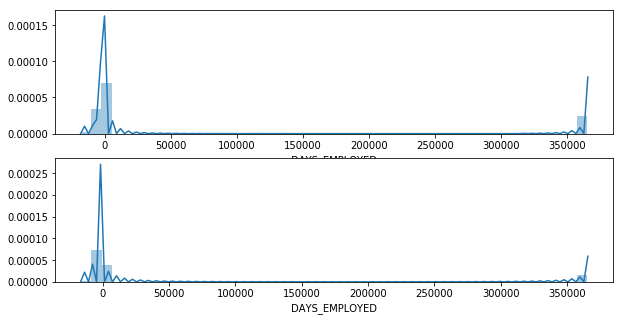

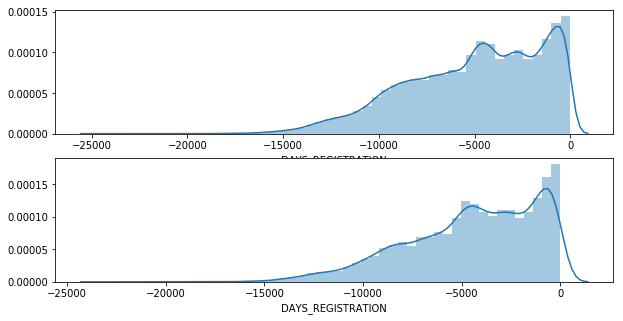

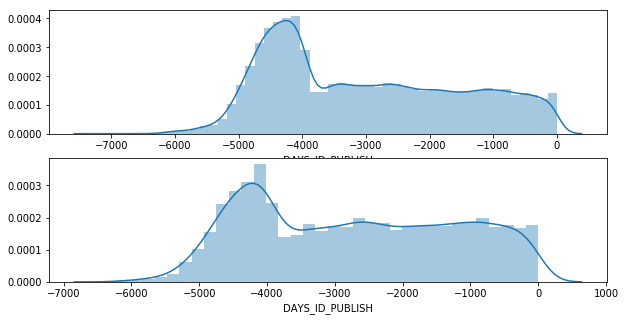

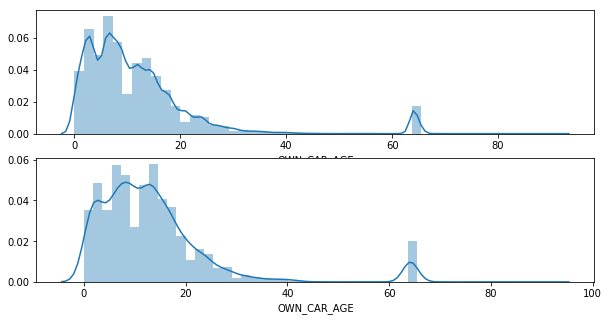

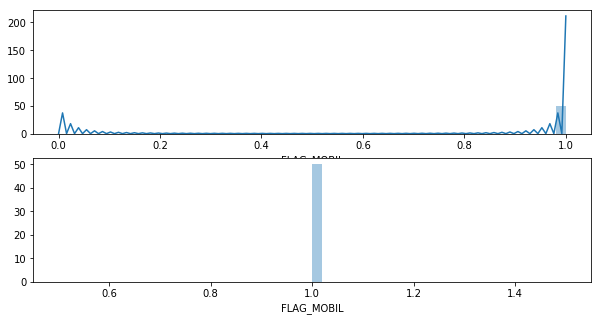

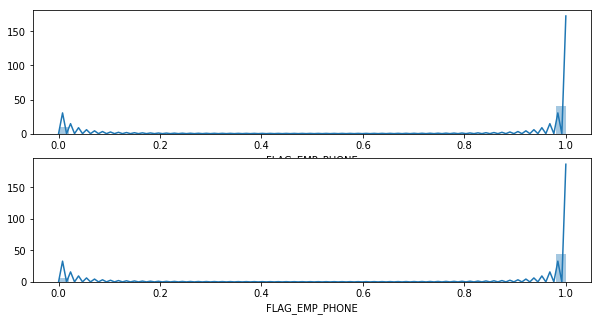

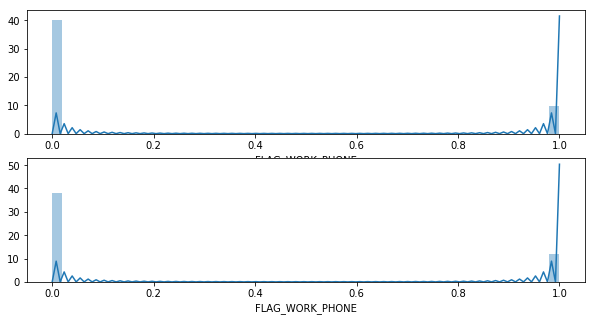

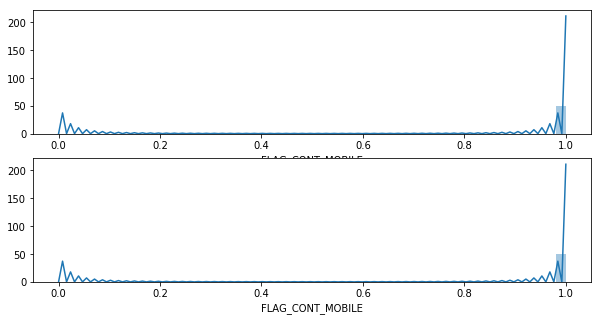

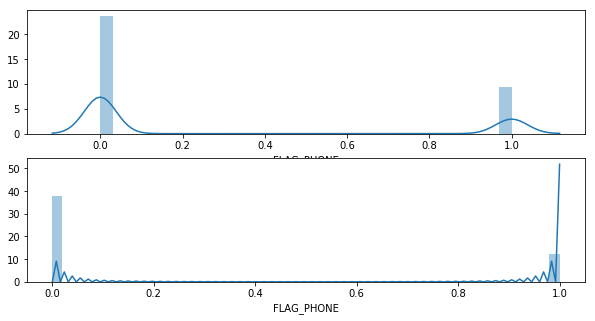

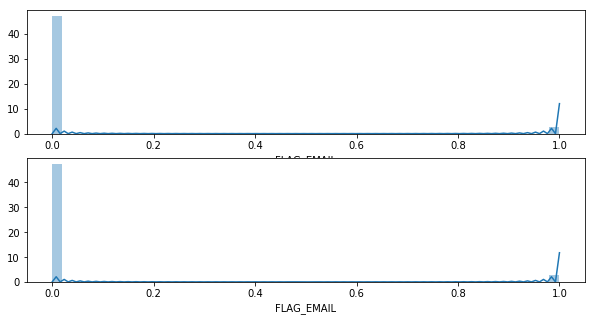

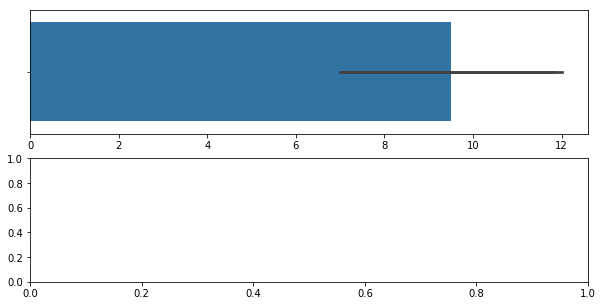

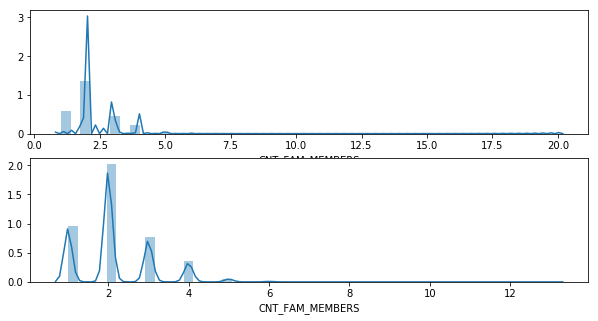

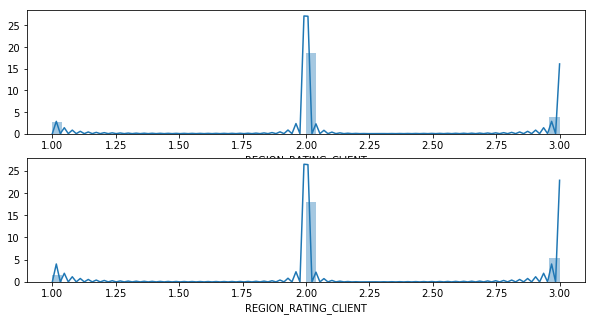

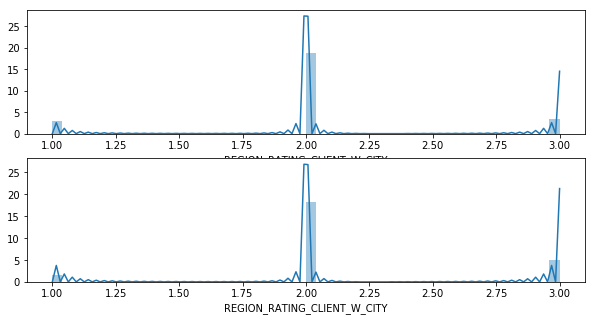

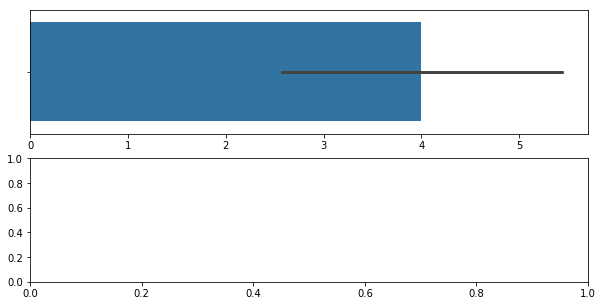

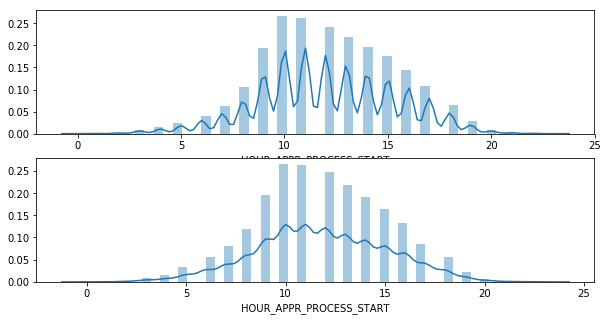

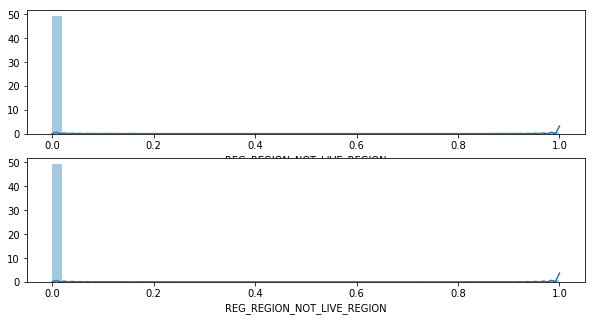

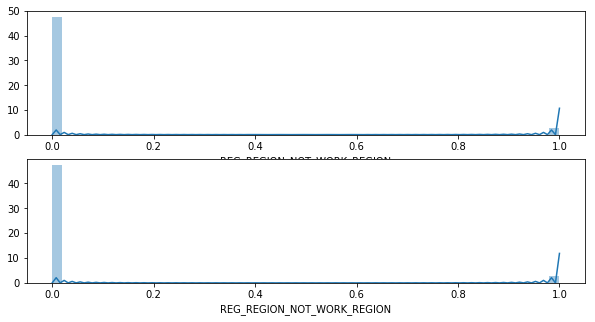

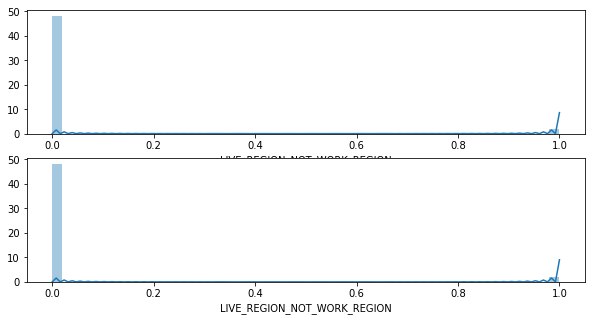

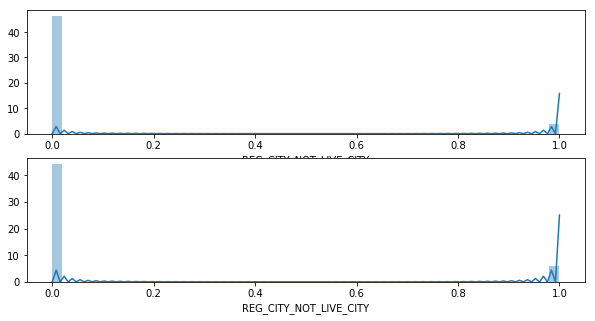

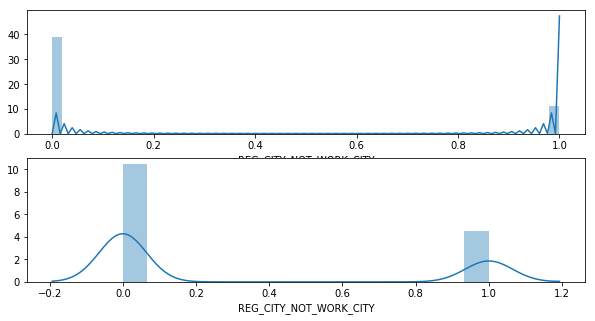

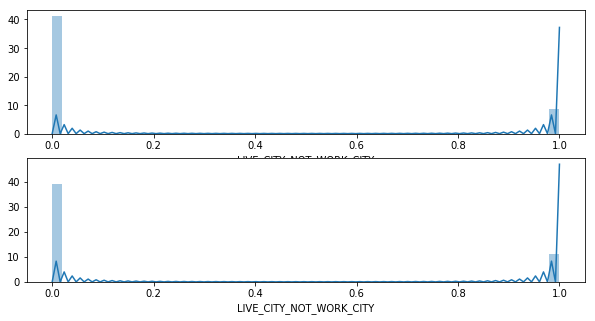

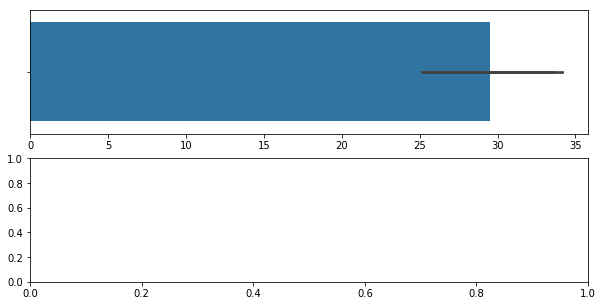

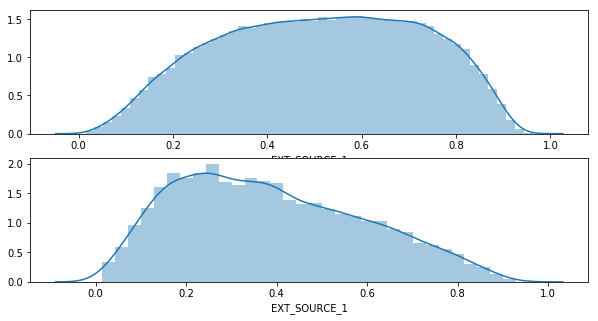

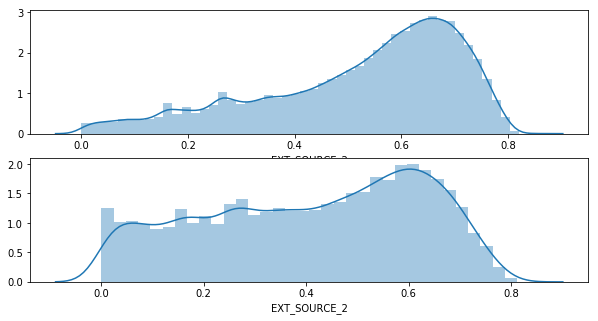

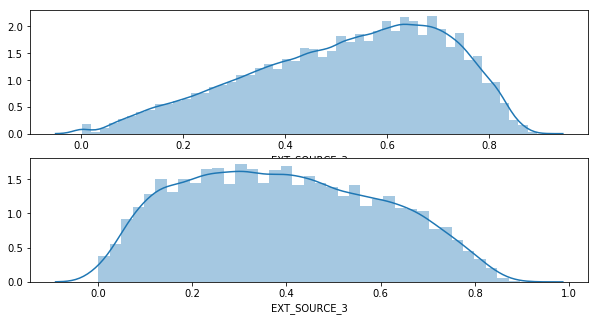

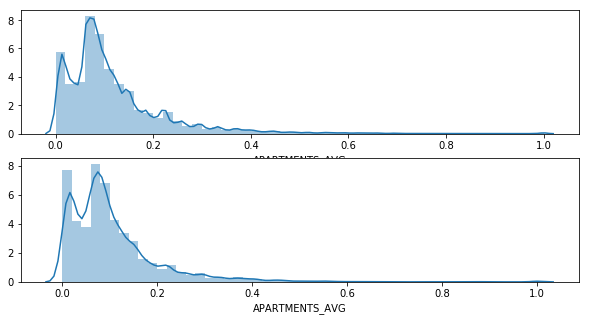

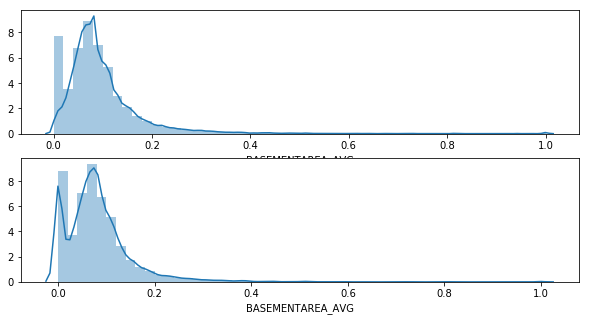

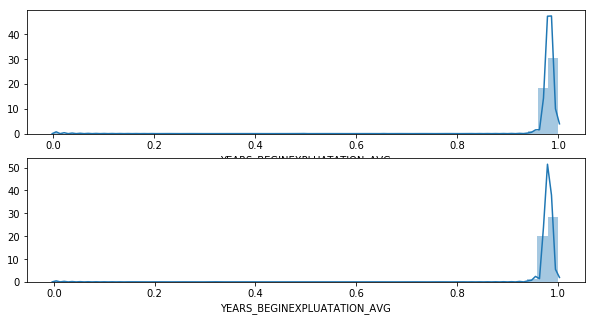

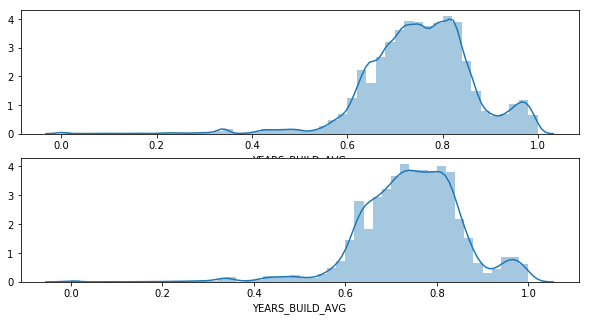

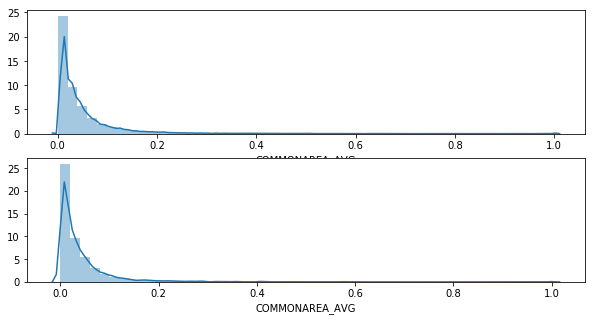

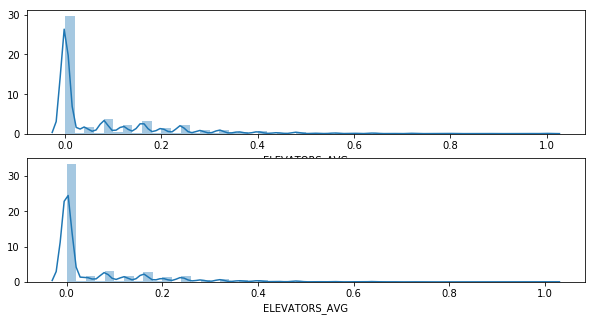

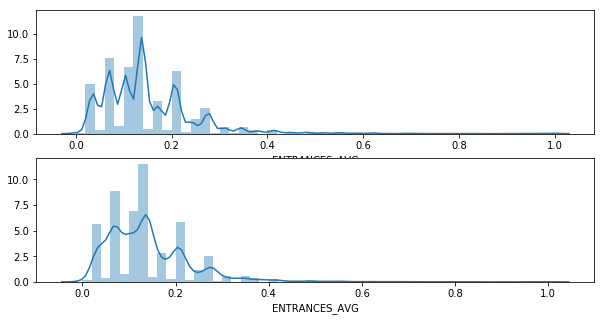

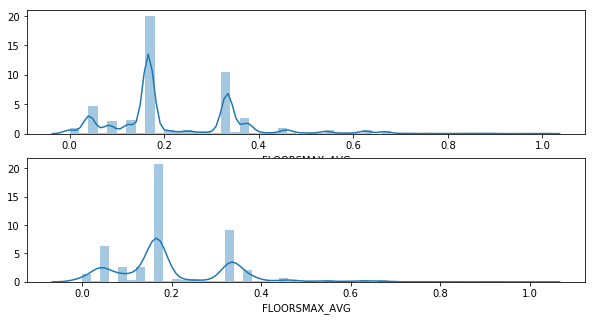

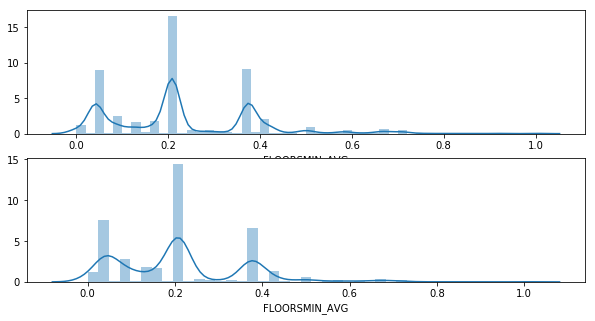

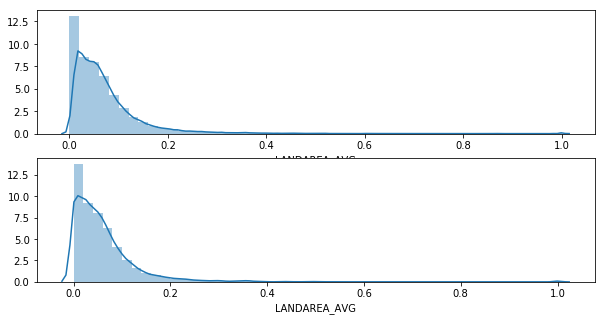

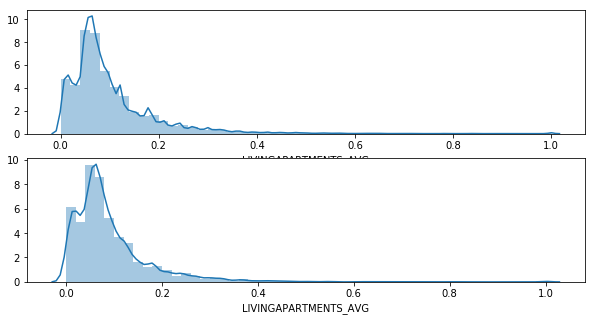

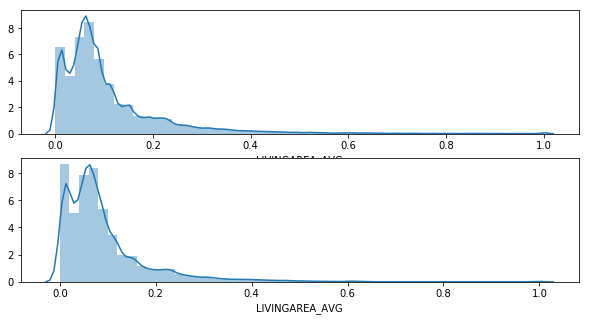

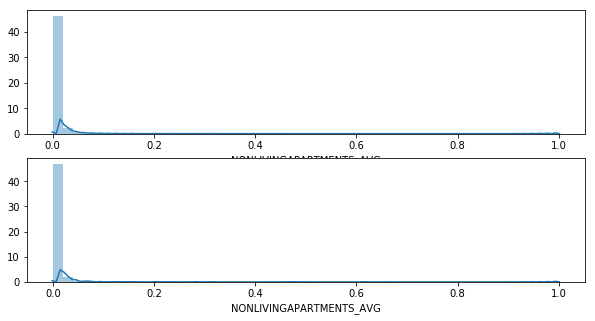

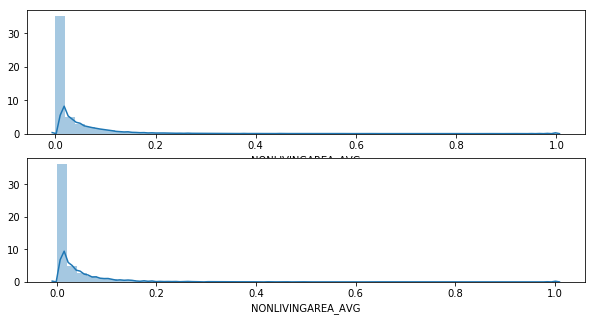

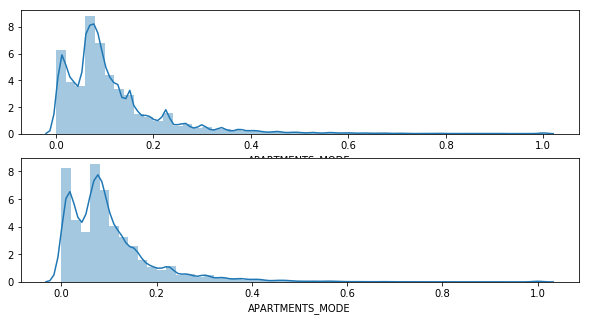

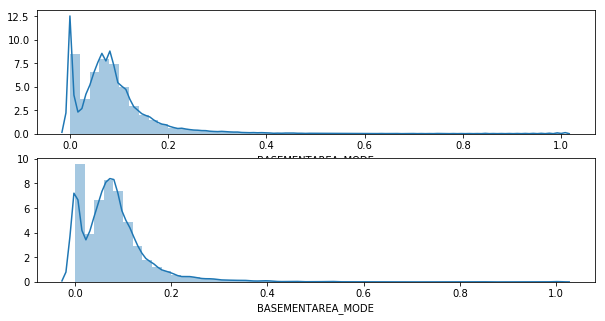

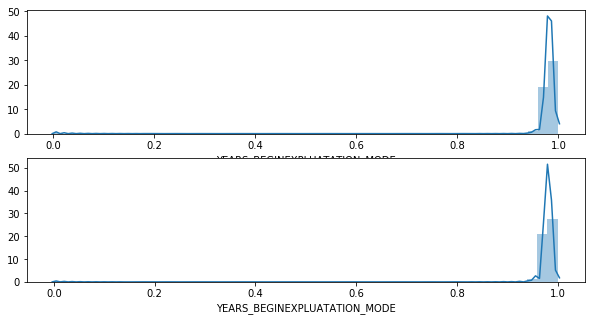

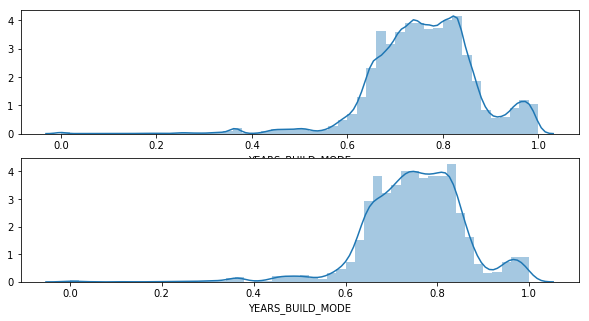

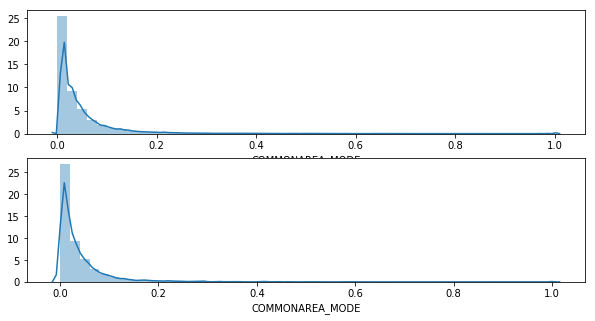

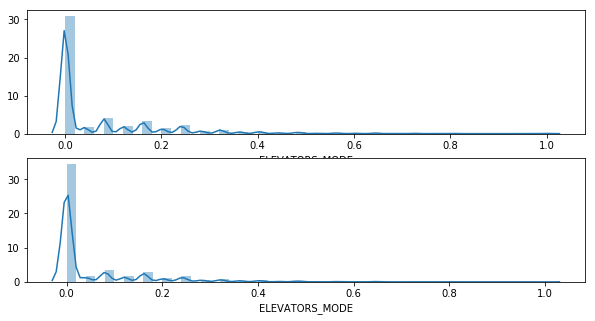

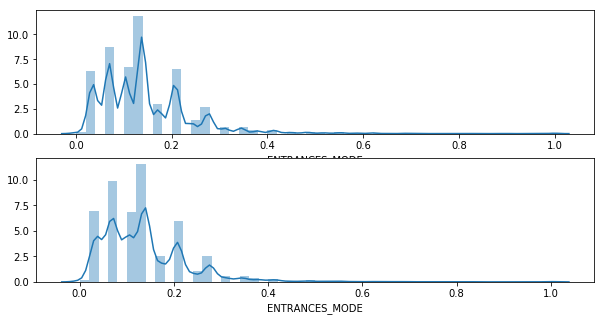

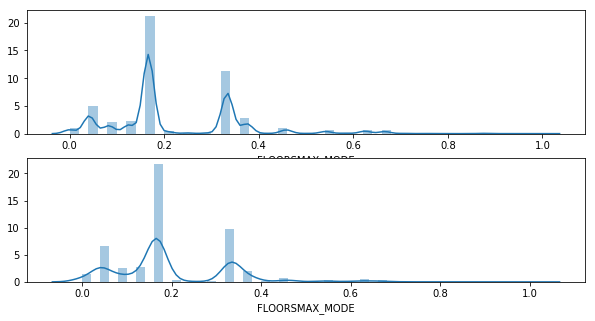

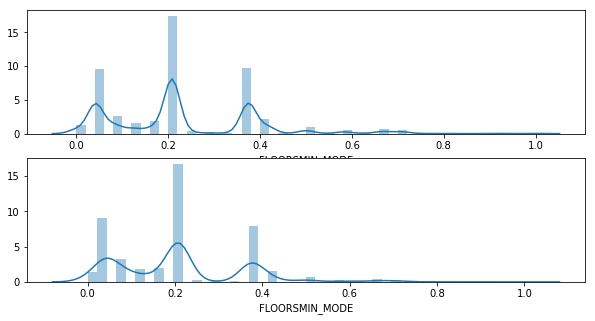

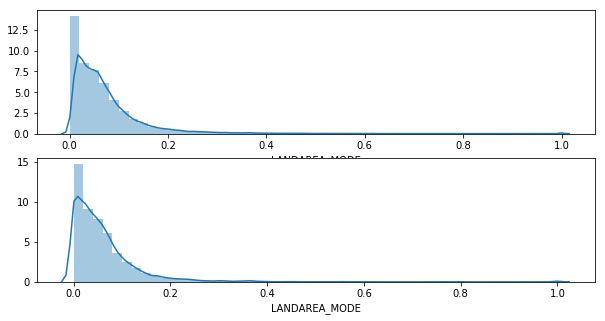

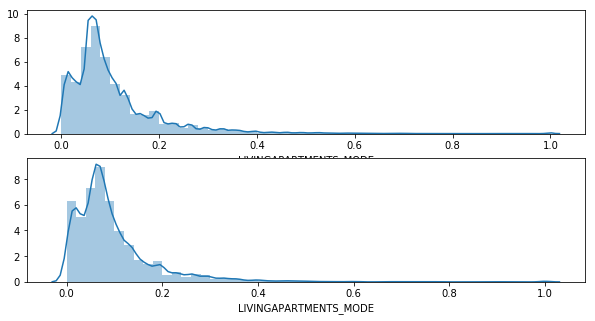

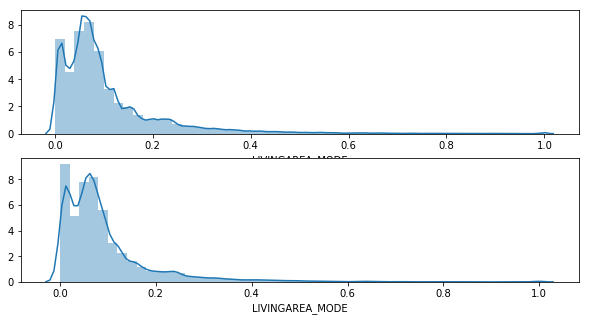

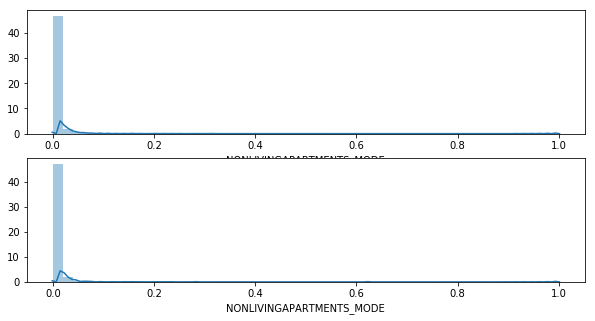

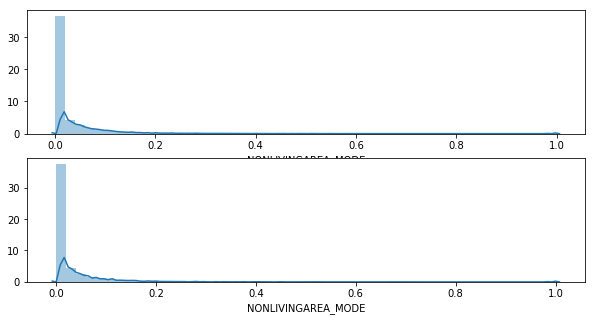

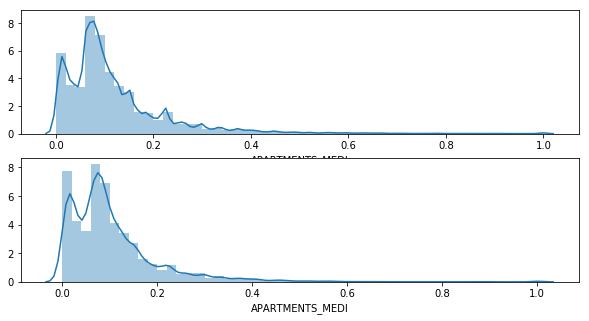

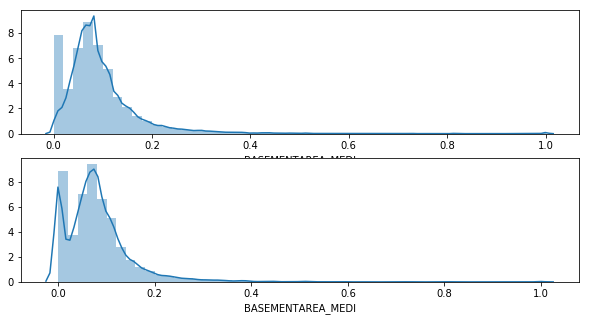

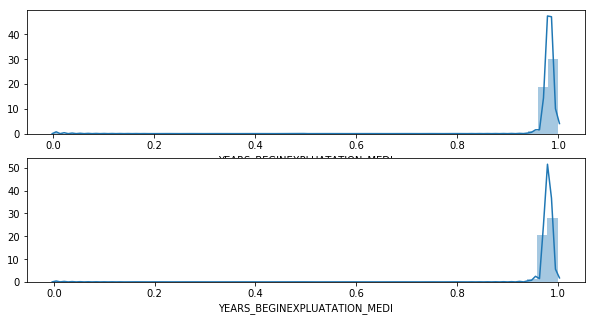

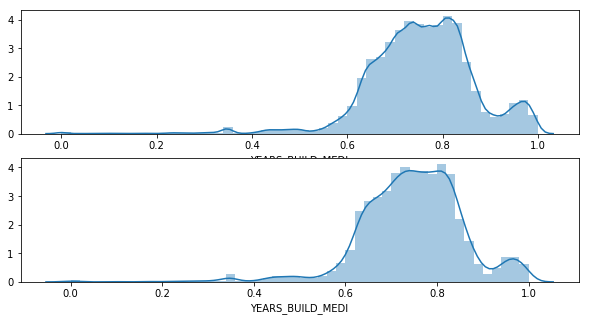

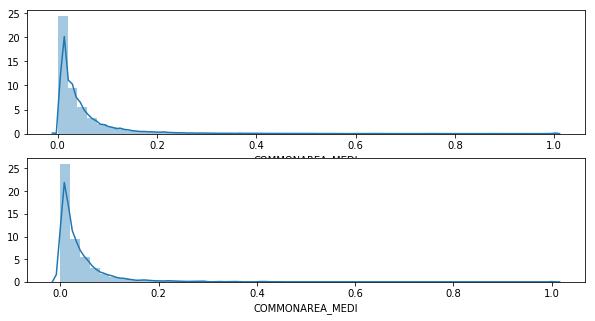

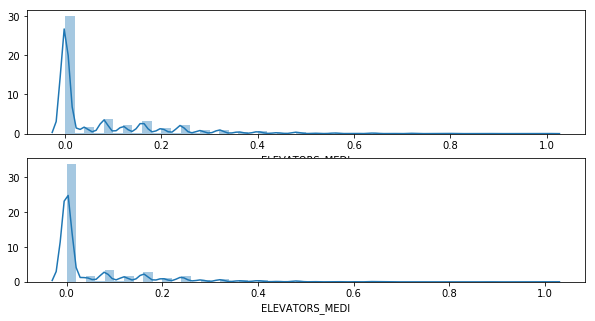

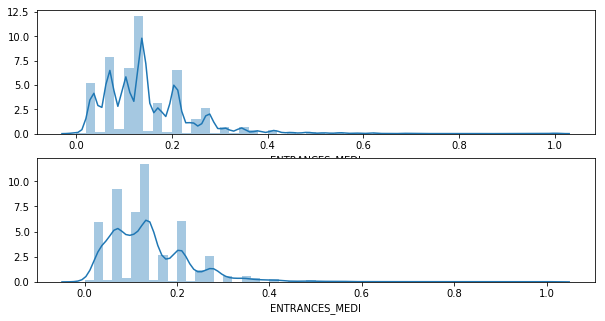

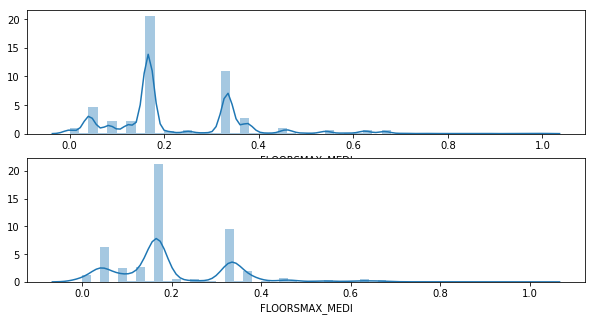

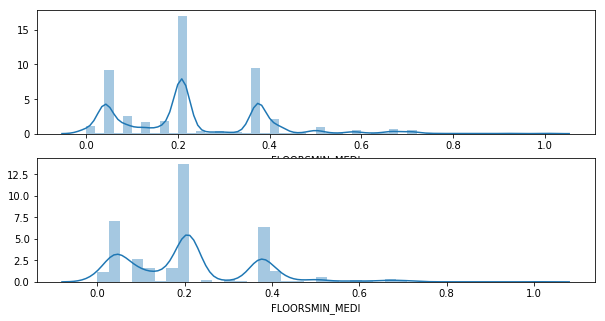

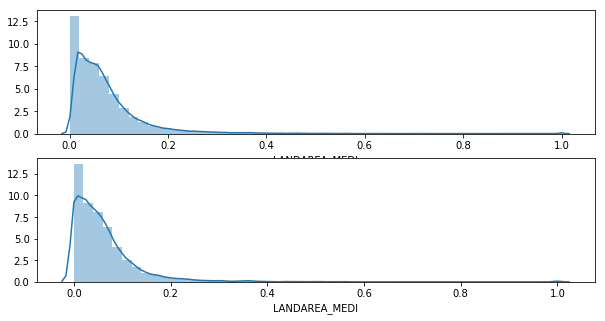

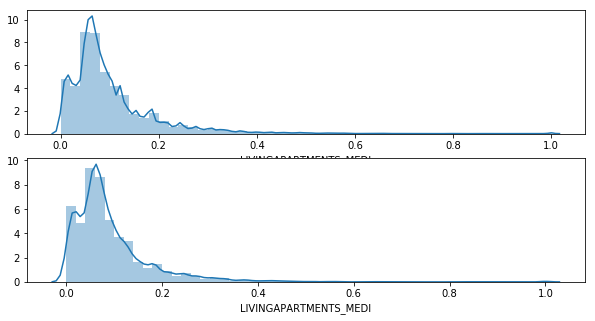

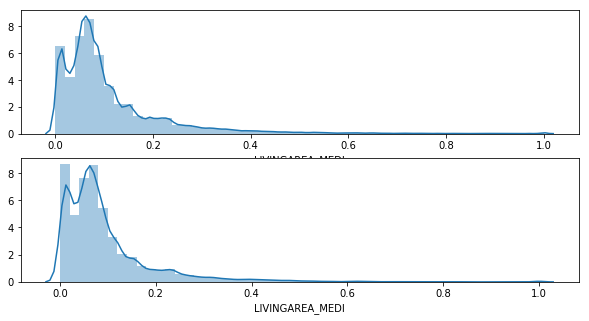

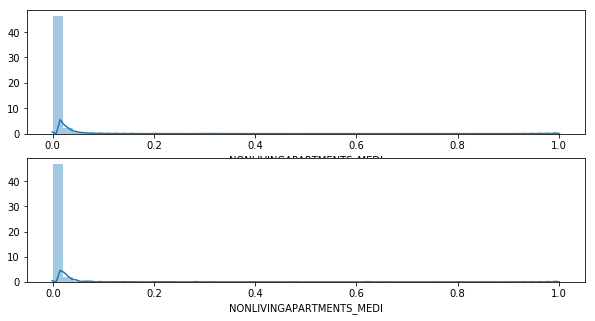

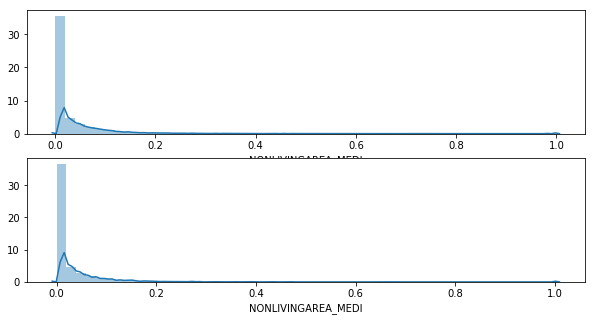

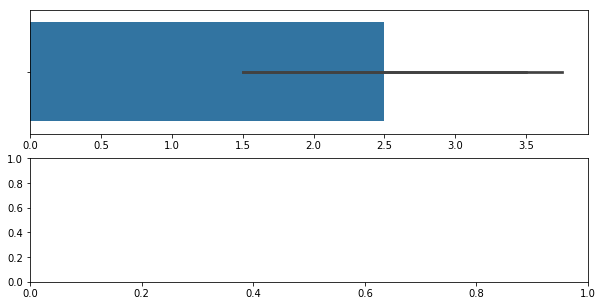

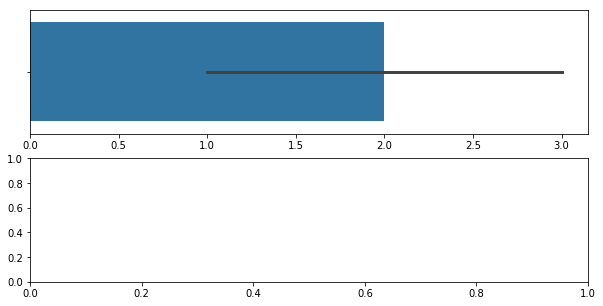

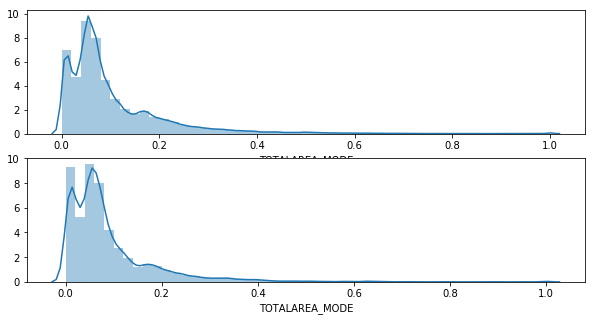

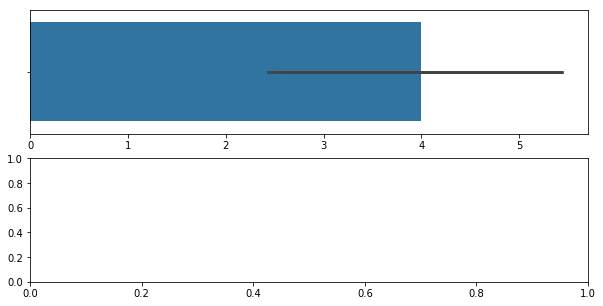

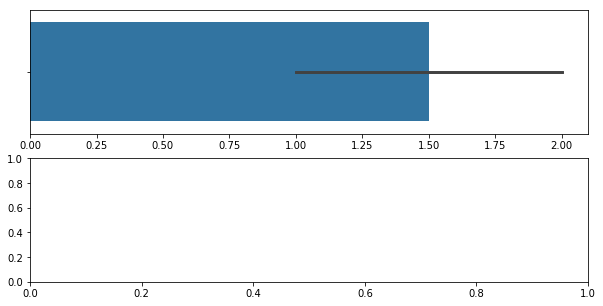

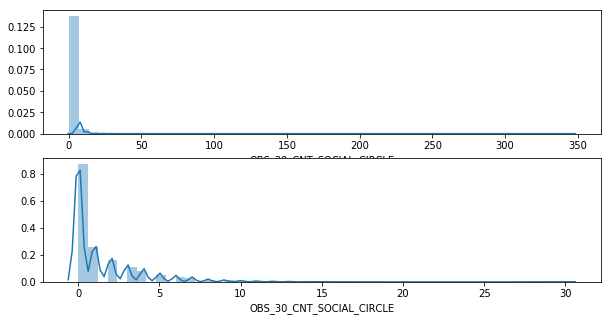

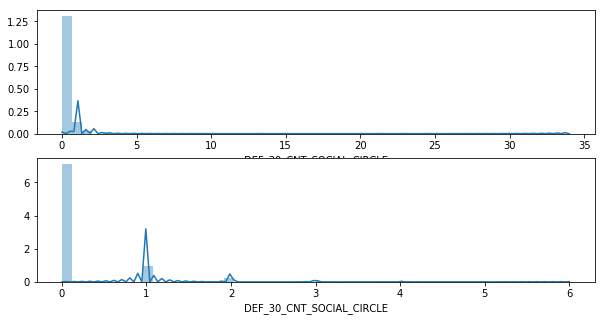

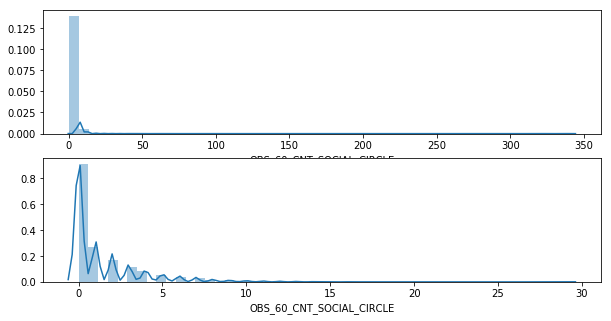

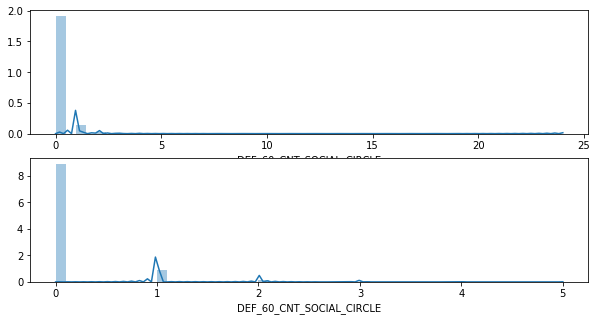

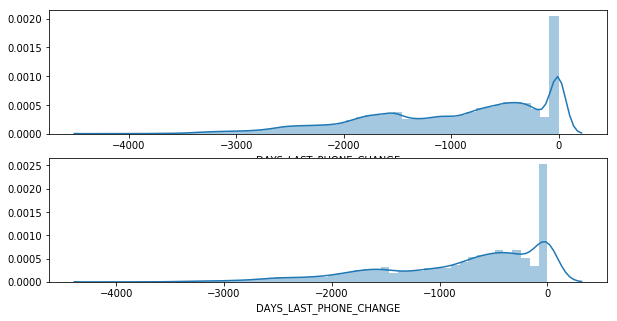

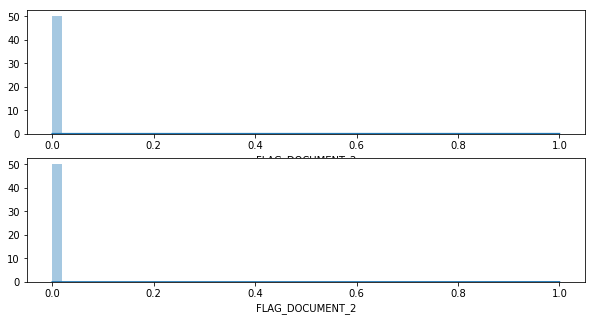

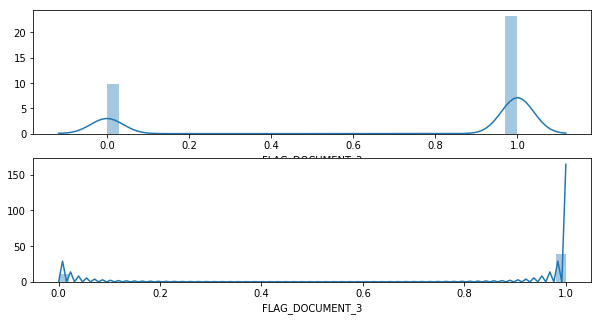

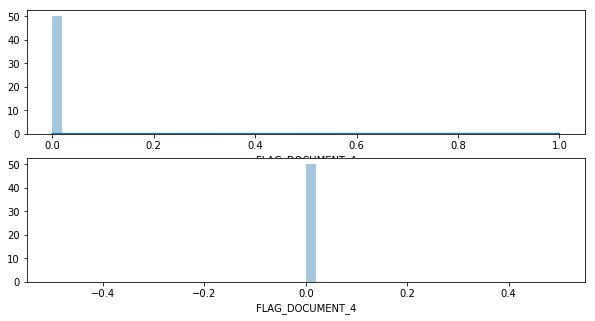

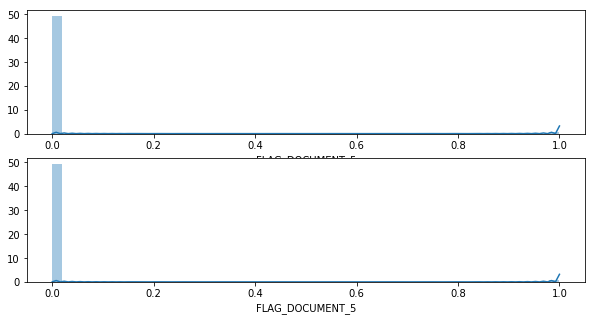

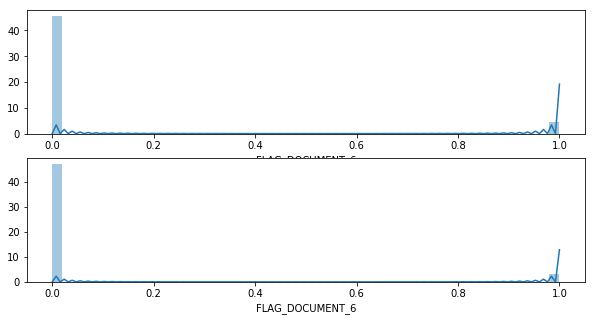

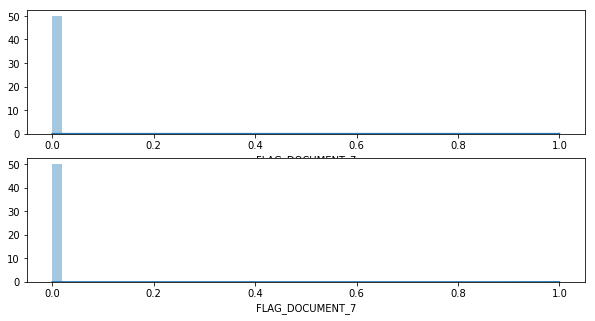

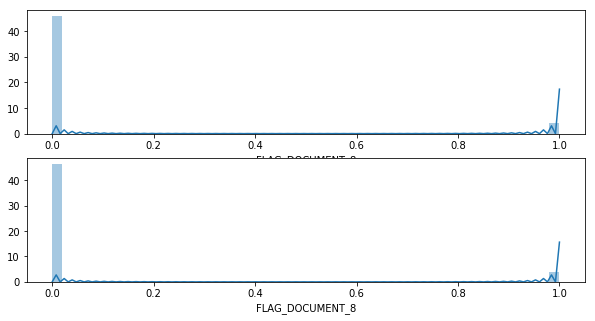

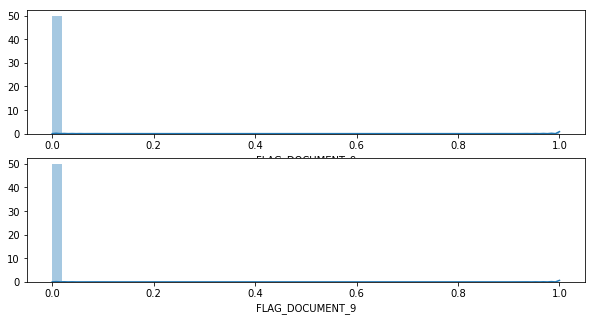

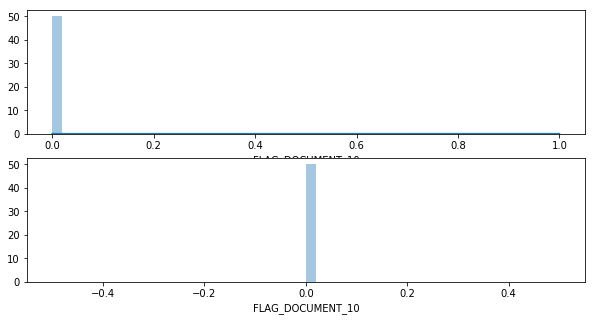

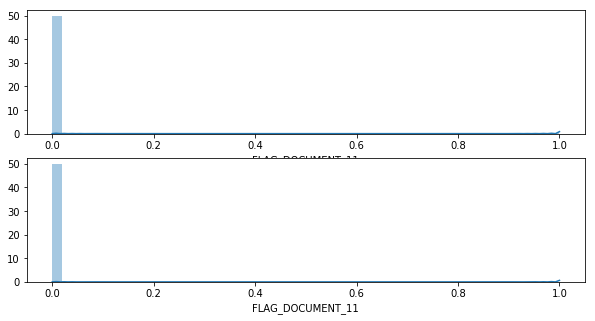

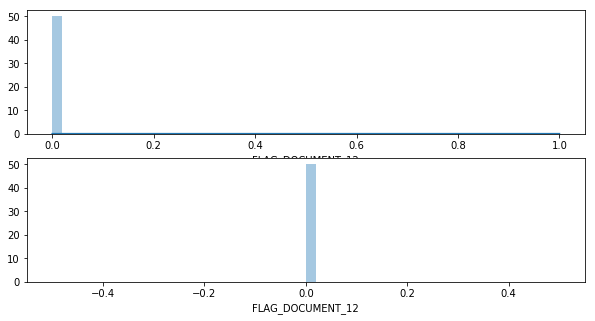

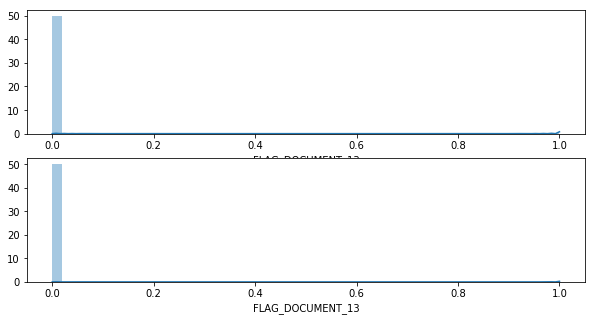

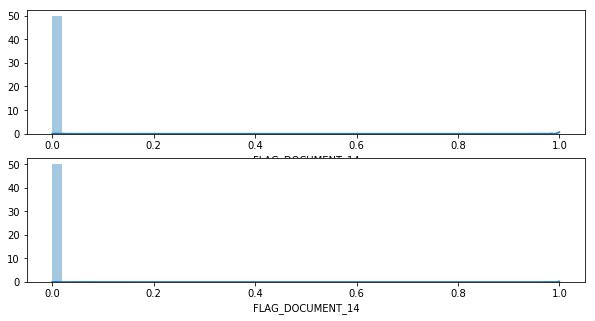

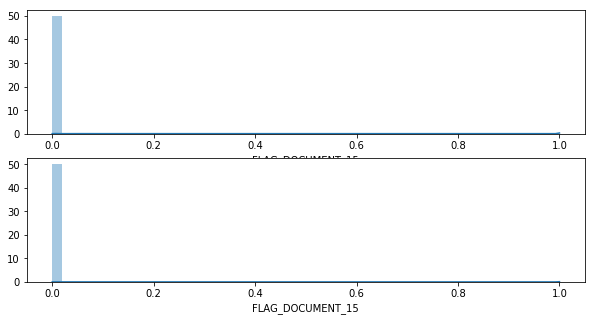

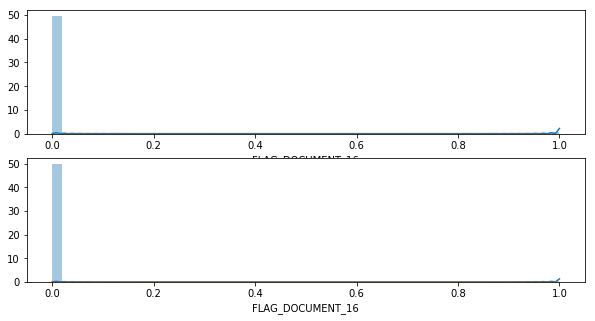

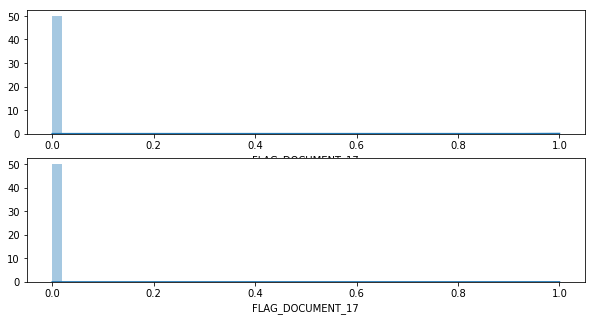

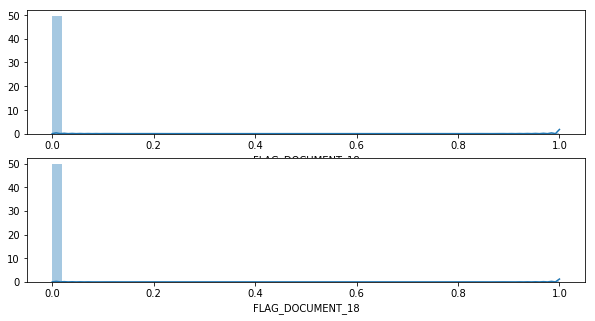

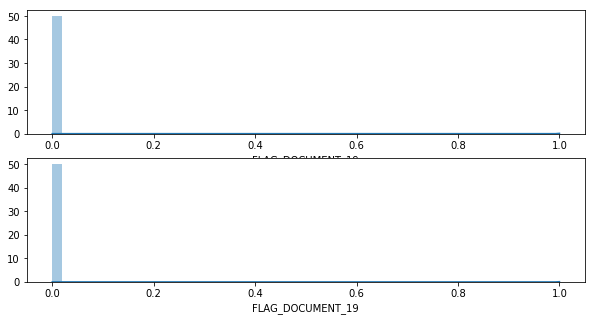

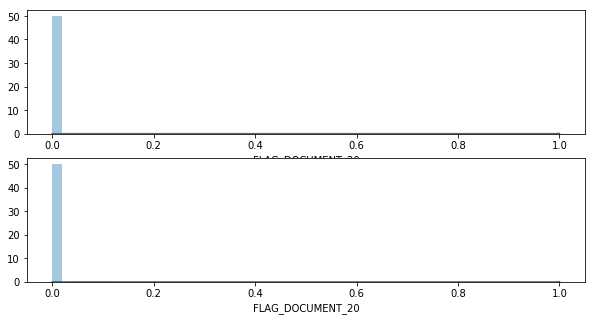

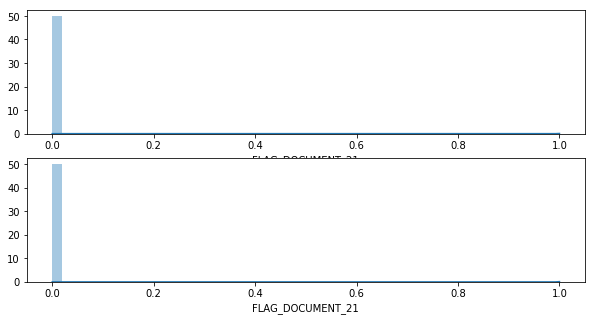

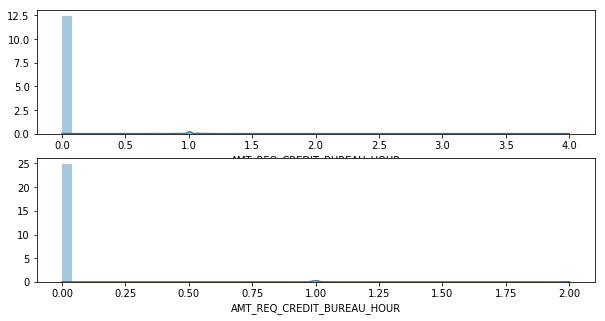

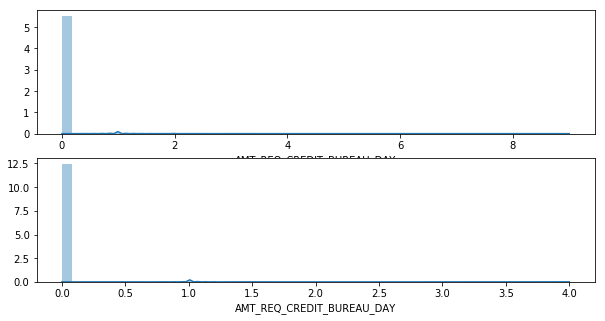

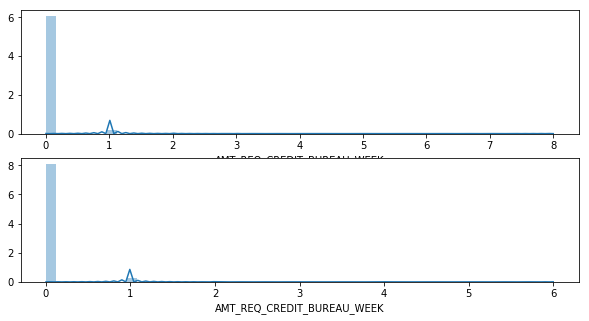

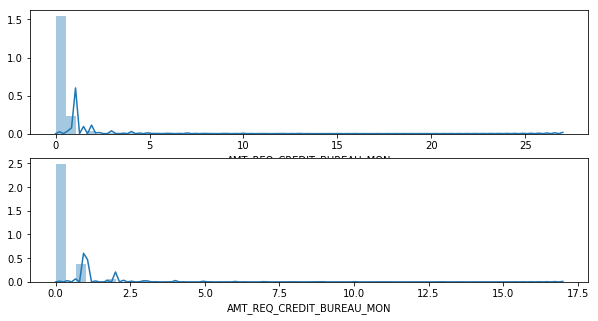

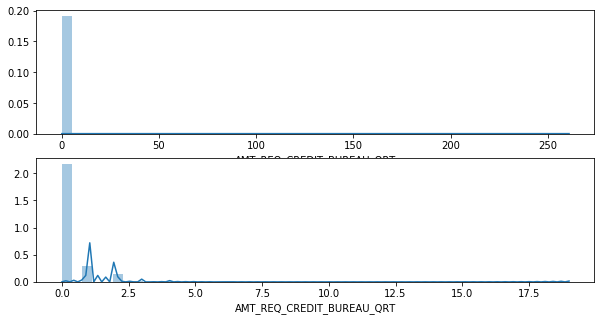

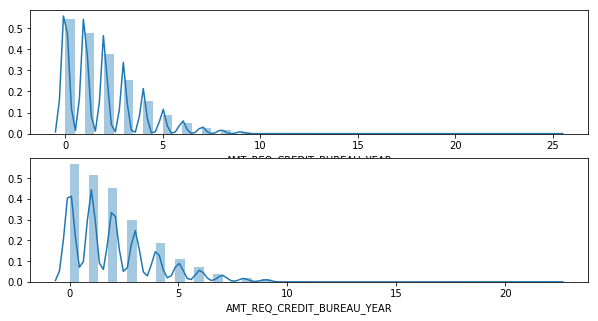

In [103]:
#画出所有的feature在不同的target下的分布
for i in train.columns:
    print('='*10, i,"+")
    plot_col_dis_by_target(i)

In [17]:
#去掉缺失率 > 0.6的列
"""loss_columns = loss_stat[loss_stat > 0.6].index
drop_columns.extend(loss_columns)
loss_columns"""

'loss_columns = loss_stat[loss_stat > 0.6].index\ndrop_columns.extend(loss_columns)\nloss_columns'

### 处理缺失值

In [19]:
def drop_ext_data(df):
    '''去掉有AVG MODE MDEI的数据，因为这些数据普遍缺失率非常高'''
    medi_avg_mode = [f_ for f_ in df.columns if '_AVG' in f_ or '_MODE' in f_ or '_MEDI' in f_]
    df.drop(medi_avg_mode, axis=1, inplace=True)
    return df

In [20]:
df = drop_ext_data(df)

CODE_GENDER里面有XNA，且只有几条条记录，删掉

In [128]:
train['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [119]:
train = train[train['CODE_GENDER']!='XNA']

NAME_CONTRACT_TYPE

In [129]:
train['NAME_CONTRACT_TYPE'].value_counts(dropna=False)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [131]:
#虽然有两个值，但是并不适合做二值化
one_hot_columns.append('NAME_CONTRACT_TYPE')

FLAG_OWN_CAR

In [132]:
train['FLAG_OWN_CAR'].value_counts(dropna=False)

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [133]:
#这个适合二值化
#bin_columns.append("FLAG_OWN_CAR")

train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].map({"Y":1,"N":0})

FLAG_OWN_REALTY	

In [135]:
train['FLAG_OWN_REALTY'].value_counts(dropna=False)

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [136]:
#二值化
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].map({"Y":1,"N":0})

CNT_CHILDREN

In [138]:
train['CNT_CHILDREN'].value_counts(dropna=False)

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [143]:
#有些有孩子特别多，观察一下
for i in range(train['CNT_CHILDREN'].nunique()):
    #看每有几个孩子的逾期比例
    print("{0} children:{1:.3f}".format(i,train[train['CNT_CHILDREN'] == i]['TARGET'].sum()/len(train[train['CNT_CHILDREN'] == i]['TARGET'])))

0 children:0.077
1 children:0.089
2 children:0.087
3 children:0.096
4 children:0.128
5 children:0.083
6 children:0.286
7 children:0.000
8 children:0.000
9 children:1.000
10 children:0.000
11 children:1.000
12 children:0.000
13 children:nan
14 children:0.000


In [145]:
#大致的趋势是孩子越多，逾期率越高，给数据做一个平方处理，加大区分度
train['CNT_CHILDREN_2'] = train['CNT_CHILDREN']*train['CNT_CHILDREN']
drop_columns.append('CNT_CHILDREN')

AMT_INCOME_TOTAL

In [146]:
train['AMT_INCOME_TOTAL'].value_counts(dropna=False)

135000.000    35750
112500.000    31019
157500.000    26556
180000.000    24719
90000.000     22483
225000.000    20698
202500.000    16341
67500.000     11147
270000.000    10827
81000.000      6001
315000.000     5862
247500.000     5344
126000.000     4668
360000.000     4115
121500.000     3848
99000.000      3633
292500.000     3418
103500.000     3330
76500.000      3146
144000.000     3123
171000.000     2647
450000.000     2435
117000.000     2390
54000.000      2319
72000.000      2187
166500.000     2053
45000.000      2043
108000.000     1946
337500.000     1790
94500.000      1747
162000.000     1702
189000.000     1691
405000.000     1660
85500.000      1514
148500.000     1486
216000.000     1406
130500.000     1256
58500.000      1182
63000.000      1145
193500.000     1061
153000.000     1012
211500.000      985
382500.000      966
139500.000      834
175500.000      800
540000.000      758
49500.000       738
234000.000      666
675000.000      659
207000.000      637


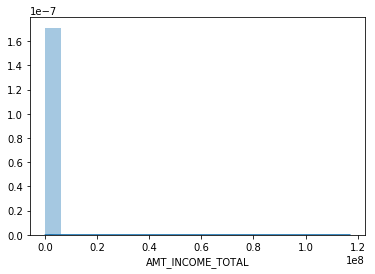

In [151]:
sns.distplot(train['AMT_INCOME_TOTAL'], bins=20)

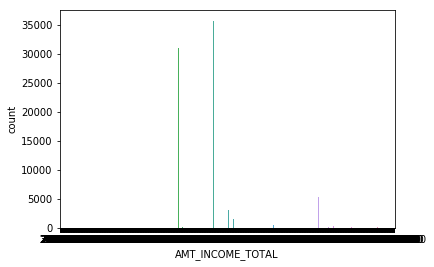

In [150]:
sns.countplot(train['AMT_INCOME_TOTAL'])

In [ ]:
#能很明显的看到，收入集中在低收入区间

In [107]:
train.columns.to_frame()

,0
SK_ID_CURR,SK_ID_CURR
TARGET,TARGET
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE
CODE_GENDER,CODE_GENDER
FLAG_OWN_CAR,FLAG_OWN_CAR
FLAG_OWN_REALTY,FLAG_OWN_REALTY
CNT_CHILDREN,CNT_CHILDREN
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL
AMT_CREDIT,AMT_CREDIT
AMT_ANNUITY,AMT_ANNUITY


## 看异常值

In [22]:
has_data_cols = train.describe().columns.tolist() #能统计数据的列
has_data_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 '

### 看相关性

#### 看所有的值与TARGET之间的相关性

In [29]:
correlations = train.corr()['TARGET'].sort_values()

In [33]:
correlations.head(15)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
Name: TARGET, dtype: float64

In [32]:
correlations.tail(15)

DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

#### 这几个相关性最高，瞅一下

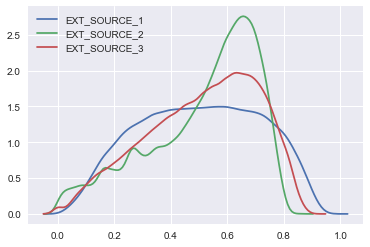

In [83]:
sns.kdeplot(train['EXT_SOURCE_1'])
sns.kdeplot(train['EXT_SOURCE_2'])
sns.kdeplot(train['EXT_SOURCE_3'])

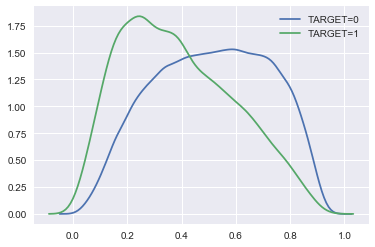

In [84]:
sns.kdeplot(train[train['TARGET']==0]['EXT_SOURCE_1'], label="TARGET=0")
sns.kdeplot(train[train['TARGET']==1]['EXT_SOURCE_1'], label="TARGET=1")

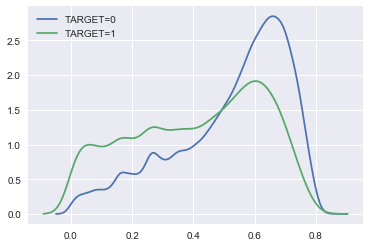

In [85]:
sns.kdeplot(train[train['TARGET']==0]['EXT_SOURCE_2'], label="TARGET=0")
sns.kdeplot(train[train['TARGET']==1]['EXT_SOURCE_2'], label="TARGET=1")

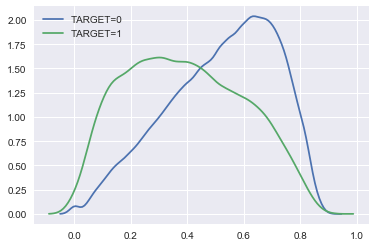

In [86]:
sns.kdeplot(train[train['TARGET']==0]['EXT_SOURCE_3'], label="TARGET=0")
sns.kdeplot(train[train['TARGET']==1]['EXT_SOURCE_3'], label="TARGET=1")

#### 看到EXT_SOURCE_1和EXT_SOURCE_3区分度比较高，而EXT_SOURCE_2区分度不高

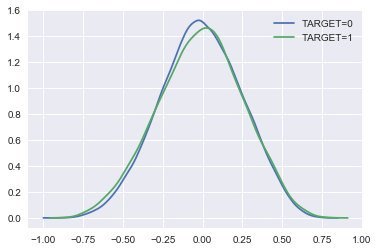

In [87]:
sns.kdeplot(train[train['TARGET']==0]['EXT_SOURCE_3']-train[train['TARGET']==0]['EXT_SOURCE_1'], label="TARGET=0")
sns.kdeplot(train[train['TARGET']==1]['EXT_SOURCE_3']-train[train['TARGET']==1]['EXT_SOURCE_1'], label="TARGET=1")

## 2.3 看object序列

In [21]:
#看一下所有的object列
object_cols = train.select_dtypes(include=['object'])
object_cols

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity


In [22]:
object_cols = train.select_dtypes(include=['object']).nunique()
object_cols

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

一般这些都做成one hot编码，控制一下变量类型数量在10个以下.
2个值的用Label Encoder编码

** 不过在观察这些变量的过程中，发现有些作为有序数据会更好，例如NAME_INCOME_TYPE NAME_EDUCATION_TYPE，这些用label encoder编码**

In [23]:
#Label Encoder编码两个值的列
le = LabelEncoder()
two_catagory_cols = [x for x,y in zip(object_cols.index, object_cols.values) if y==2]
print(two_catagory_cols)

['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


In [24]:
#由于缺失值尚未处理，所以暂时先用onehot处理

"""for i in two_catagory_cols:
    print(i)
    train[i] = le.fit_transform(train[i])
    test[i]  = le.fit_transform(test[i])"""

'for i in two_catagory_cols:\n    print(i)\n    train[i] = le.fit_transform(train[i])\n    test[i]  = le.fit_transform(test[i])'

#### 由于有缺失值，所以暂时无法单独进行label编码，所以先对所有类型变量进行OneHot编码
TODO:在填补缺失值之后，对二值数据进行label编码，减小维度

In [25]:
def encode_object(df, nan_as_category = True, max_category=10):
    '''对类型数据进行One hot编码
        nan_as_category:空值是否作为一个编码
        max_category：如果类型数量大于此值，则不编码
    '''
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique()<=max_category]
    new_df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    
    return new_df

In [26]:
train = encode_object(train,max_category=100)

In [27]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 199 columns):
SK_ID_CURR                                           int32
TARGET                                               int8
CNT_CHILDREN                                         int8
AMT_INCOME_TOTAL                                     float32
AMT_CREDIT                                           float32
AMT_ANNUITY                                          float32
AMT_GOODS_PRICE                                      float32
REGION_POPULATION_RELATIVE                           float16
DAYS_BIRTH                                           int16
DAYS_EMPLOYED                                        int32
DAYS_REGISTRATION                                    float16
DAYS_ID_PUBLISH                                      int16
OWN_CAR_AGE                                          float16
FLAG_MOBIL                                           int8
FLAG_EMP_PHONE                                     

# 构造特征

In [30]:
def get_object_cols(df):
    '''获取object的列'''
    return df.select_dtypes(include=["object"])

In [71]:
#验证构造特征与target的相关性变化
def check_featrure_update(target, before_features, after_features):
    if isinstance(before_features, pd.DataFrame):
        for i in before_features.columns:
            print("Before feature is :{0}, corr with TARGET is:{1}".format(i, target.corr(before_features[i])))
    else:
        print("Before feature corr with TARGET is:{}".format(train.TARGET.corr(before_features)))
    if isinstance(after_features, pd.DataFrame):
        for i in after_features.columns:
            print("After feature is :{0}, corr with TARGET is:{1}".format(i, target.corr(after_features[i])))
    else:
        print("After feature corr with TARGET is:{}".format(train.TARGET.corr(after_features)))
           

# 分割训练集数据集

In [28]:
#去掉不能作为训练集的列
train_drop_cols = ['SK_ID_CURR', 'TARGET']
train_cols = [x for x in train.columns if x not in train_drop_cols]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(train[train_cols], train['TARGET'])

# 模型训练

### xgboost

In [30]:
import xgboost as xgb

In [53]:
model_xgb = xgb.XGBClassifier(max_depth=8, learning_rate=0.06, n_estimators=2000, booster='gbtree', 
                              min_child_weight=0.5, n_jobs=4, )

In [ ]:
sample_weight = [1 if x == 0 else 2 for x in train['TARGET']]

model_xgb.fit(x_train,y_train, sample_weight=sample_weight,eval_metric='auc')

In [ ]:
xgb_pred = model_xgb.predict(x_test)

In [ ]:
def report_metrics(y_true, y_pred):
    _acc = accuracy_score(y_true, y_pred)
    _recall = recall_score(y_true, y_pred)
    fpr,tpr, thred = roc_curve(y_true, y_pred)
    _auc = auc(fpr,tpr)
    print("accuracy:{0}, recall:{1}, auc:{2}".format(_acc,_recall,_auc))

In [ ]:
report_metrics(y_test, xgb_pred)

### Neural networks神经网络

In [ ]:
import keras
from keras.model import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizer import SGD

### 快速验证模块
这个模块主要用来快速验证构造的特征是否有用

In [28]:
#去掉不能作为训练集的列
train_drop_cols = ['SK_ID_CURR', 'TARGET']
train_cols = [x for x in train.columns if x not in train_drop_cols]
x_train, x_test, y_train, y_test = train_test_split(train[train_cols], train['TARGET'])
x_train, x_test, y_train, y_test = train_test_split(x_test, y_test)

In [30]:
import xgboost as xgb

In [53]:
model_xgb = xgb.XGBClassifier(max_depth=8, learning_rate=0.06, n_estimators=2000, booster='gbtree', 
                              min_child_weight=0.5, n_jobs=4, )

In [ ]:
sample_weight = [1 if x == 0 else 2 for x in train['TARGET']]

model_xgb.fit(x_train,y_train, sample_weight=sample_weight,eval_metric='auc')

In [ ]:
xgb_pred = model_xgb.predict(x_test)

In [ ]:
def report_metrics(y_true, y_pred):
    _acc = accuracy_score(y_true, y_pred)
    _recall = recall_score(y_true, y_pred)
    fpr,tpr, thred = roc_curve(y_true, y_pred)
    _auc = auc(fpr,tpr)
    print("accuracy:{0}, recall:{1}, auc:{2}".format(_acc,_recall,_auc))

In [ ]:
report_metrics(y_test, xgb_pred)